# **Data Analytics | 24 March 2022**
------

## Network Analytics Lab

Lecturer: **Alex Graudenzi**

*email*: alex.graudenzi@unimib.it

------

This tutorial is adapted from: https://github.com/vtraag/4TU-CSS and https://igraph.org/python/doc/tutorial/tutorial.html

Credits: Matteo Mistri

## IPython Notebook (ONLY FOR LOCAL USAGE)

The **IPython Notebook**, or Jupyter Notebook, is an interactive computational environment, in which you can combine code execution, rich text, mathematics, plots and rich media. For more details on the Jupyter Notebook, please see the Jupyter website.

### Install

```
pip install jupyter
```

### Running Jupyter

You can start the dashboard on any system via the command prompt by entering the command
```
jupyter notebook
```
The URL for the dashboard will be something like http://localhost:8888/tree.


### Cells

Cells form the body of a notebook. There are two main cell types:

- A **code cell** contains code to be executed in the kernel and displays its output below.
- A **Markdown cell** contains text formatted using Markdown and displays its output in-place when it is run.


### Shortcuts

- **Shift + Enter** run the current cell, select below
- **Ctrl + Enter** run selected cells
- **Alt (option for Mac) + Enter** run the current cell, insert below
- **Ctrl + S** save and checkpoint

In [ ]:
print('Hello World!')

Hello World!


## Goals of this lab

- **Introduce** the *iGraph* library.
- **Learn** how to interact with graph structures.
- **Discover** how to compute network centrality measures.

## Install packages

In [ ]:
!sudo apt install build-essential python-dev libxml2 libxml2-dev zlib1g-dev
!sudo pip install cairocffi
!pip install python-igraph

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Package python-dev is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source
However the following packages replace it:
  python2-dev python2 python-dev-is-python3

E: Package 'python-dev' has no installation candidate


## Documentation

https://igraph.org/python/doc/tutorial/tutorial.html

https://pandas.pydata.org/docs/reference/index.html#api

https://matplotlib.org/stable/api/index.html

https://seaborn.pydata.org/api.html

In [1]:
# |1 - NETWORKS|
import igraph as ig
#igraph is a collection of network analysis tools with the emphasis on efficiency,
#portability and ease of use.

# |2 - COMPUTATION|
import numpy as np
#NumPy is an open source project aiming to enable numerical computing with Python.

from sklearn.preprocessing import MinMaxScaler
np.random.seed(0)

import scipy
#SciPy provides algorithms for optimization, integration, interpolation,
#eigenvalue problems, algebraic equations, differential equations, statistics
#and many other classes of problems.

import random
#This module implements pseudo-random number generators for various distributions.

random.seed(0)

# |3 - DATA|
import pandas as pd
#pandas is a software library written for the Python programming language for
#data manipulation and analysis. In particular, it offers data structures and
#operations for manipulating numerical tables and time series.

import csv
#The csv module implements classes to read and write tabular data in CSV format.

# |4 - PLOTTING|
import matplotlib.pyplot as plt
#Matplotlib is a comprehensive library for creating static, animated, and
#interactive visualizations in Python.

import seaborn as sns
#Seaborn is a Python data visualization library based on matplotlib. It provides
#a high-level interface for drawing attractive and informative statistical graphics.
%matplotlib inline


ModuleNotFoundError: No module named 'igraph'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Now we can upload the files from the leftmost panel.


*   File
*   Load


Alternatively, we could mount our GDrive directory




<img src="https://images.g2crowd.com/uploads/product/image/social_landscape/social_landscape_1523469721/igraph.png" width="40%" />

**igraph** is a collection of network analysis tools with the emphasis on efficiency, portability and ease of use. igraph is open source and free. igraph can be programmed in R, Python Mathematica and C/C++.

## Creating a graph from scratch

Assuming that you have started igraph successfully, it is time to create your first igraph graph. This is pretty simple:

In [ ]:
g = ig.Graph()

The above statement created an undirected graph with **no vertices or edges** and assigned it to the variable **g**. To confirm that it's really an igraph graph, we can print it:

In [ ]:
g

This tells us that g is an **instance of igraph's Graph class** and that it is currently living at the memory address [0x...] (the exact output will almost surely be different for your platform).

To obtain a more user-friendly output, we can try to print the graph using Python’s print statement:

In [ ]:
print(g)

IGRAPH U--- 0 0 --


-1- The first letter distinguishes between directed (**‘D’**) and undirected (**‘U’**) graphs.

-2- The second letter is **‘N’** for named graphs, i.e. graphs with the name vertex attribute set.

-3- The third letter is **‘W’** for weighted graphs, i.e. graphs with the weight edge attribute set.

-4- The fourth letter is **‘B’** for bipartite graphs, i.e. for graphs with the type vertex attribute set.

It is possible to manually create a graph from vertices and edges



In [ ]:
G = ig.Graph(directed=False)
#new istance G

G.add_vertices(n=4)
G.add_edges([(0, 1),
             (0, 2),
             (0, 3),
             (1, 2),
             (1, 3)])

We can get a summary of the graph, providing some basic information on the graph

In [ ]:
G.summary()

'IGRAPH U--- 4 5 -- '

The result indicates this graph is undirected (indicated by the U) has 4 nodes and 5 edges. The information on the number of nodes and edges can also be obtained using functions.



In [ ]:
n = G.vcount()
m = G.ecount()
print('The graph G has {0} nodes and {1} edges!'.format(n, m))

The graph G has 4 nodes and 5 edges!


In [ ]:
print(G)

IGRAPH U--- 4 5 --
+ edges:
0--1 0--2 0--3 1--2 1--3


We can also add nodes and edges to a graph.

In [ ]:
G.add_edges([(2,0)])
G.add_vertices(3)
G.add_edges([(2,3),(3,4),(4,5),(5,3)])

In [ ]:
# How many nodes and edges in this graph?


In [ ]:
#@title
n = G.vcount()
m = G.ecount()
print('Now, the graph G has {0} nodes and {1} edges!'.format(n, m))

Now, the graph G has 7 nodes and 10 edges!


Vertex and edge IDs are always continuous, and a direct consequence of this fact is that **if you delete an edge, chances are that some (or all) of the edges will be renumbered.**

Moreover,  **if you delete a vertex, even the vertex IDs will change**.

We can get the ordered list of edges with the function **get_edgelist**

In [ ]:
G.get_edgelist()

[(0, 1),
 (0, 2),
 (0, 3),
 (1, 2),
 (1, 3),
 (0, 2),
 (2, 3),
 (3, 4),
 (4, 5),
 (3, 5)]

In [ ]:
#We can get the vertexes connected by the edge with ID = 8
first_vertex = G.get_edgelist()[8][0]
second_vertex = G.get_edgelist()[8][1]
print('Edge with ID 8 connects vertexes {0} and {1}'.format(first_vertex,second_vertex))

Edge with ID 8 connects vertexes 4 and 5



Edges can be deleted by **delete_edges()** and it requires a list of edge IDs to be deleted (or a single edge ID).

Vertices can be deleted by **delete_vertices()** and you may have already guessed that it requires a list of vertex IDs to be deleted (or a single vertex ID).

If you do not know the ID of an edge you wish to delete, but you know the IDs of the vertices at its two endpoints, you can use **get_eid()** to get the edge ID.

In [ ]:
## Remove the edge between node 2 and 3


In [ ]:
#@title
id_edge_to_be_removed = G.get_eid(2,3)
print(id_edge_to_be_removed)
print(G)

6
IGRAPH U--- 7 10 --
+ edges:
0 -- 1 2 2 3     2 -- 0 0 1 3     4 -- 3 5         6 --
1 -- 0 2 3       3 -- 0 1 2 4 5   5 -- 3 4


In [ ]:
#@title
G.delete_edges(id_edge_to_be_removed)
print(G) #to compare the graphs

IGRAPH U--- 7 9 --
+ edges:
0 -- 1 2 2 3   2 -- 0 0 1     4 -- 3 5       6 --
1 -- 0 2 3     3 -- 0 1 4 5   5 -- 3 4


In [ ]:
#what about edge with ID = 8?

In [ ]:
#@title
first_vertex = G.get_edgelist()[8][0]
second_vertex = G.get_edgelist()[8][1]
print('Edge with ID 8 connects vertexes {0} and {1}'.format(first_vertex,second_vertex))

Edge with ID 8 connects vertexes 3 and 5


## Types of Graphs in igraph

*igraph* includes a large set of graph generators which can be divided into two groups:

1.  deterministic
2.  stochastic

graph generators

Deterministic generators produce the same graph if you call them with exactly the same parameters, while stochastic generators produce a different graph every time.


**Graph.Tree()** generates a regular tree graph. No matter how many times you call **Graph.Tree()**, the generated graph will always be the same if you use the same parameters

In [ ]:
g = ig.Graph.Tree(27, children = 3)
print(g)

IGRAPH U--- 27 26 --
+ edges:
0--1 0--2 0--3 1--4 1--5 1--6 2--7 2--8 2--9 3--10 3--11 3--12 4--13 4--14
4--15 5--16 5--17 5--18 6--19 6--20 6--21 7--22 7--23 7--24 8--25 8--26


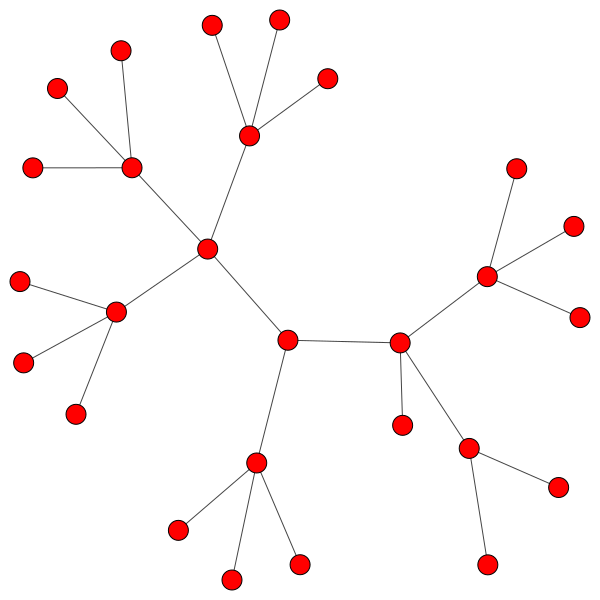

In [ ]:
ig.plot(g)

Some plotting options

https://igraph.org/python/tutorial/latest/visualisation.html#plotting-options

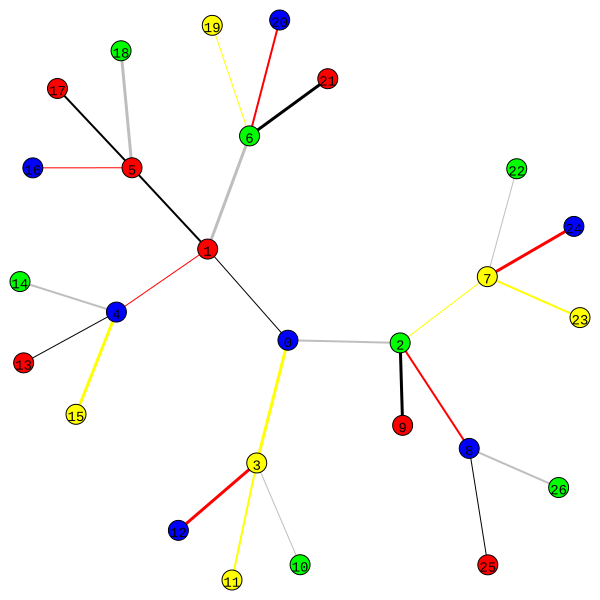

In [ ]:
ig.plot(g,
        vertex_size=20,
        vertex_color=['blue', 'red', 'green', 'yellow'],
        vertex_label=g.vs.indices,
        edge_width=[1,2,3],
        edge_color=['black', 'grey','yellow','red'],
        )

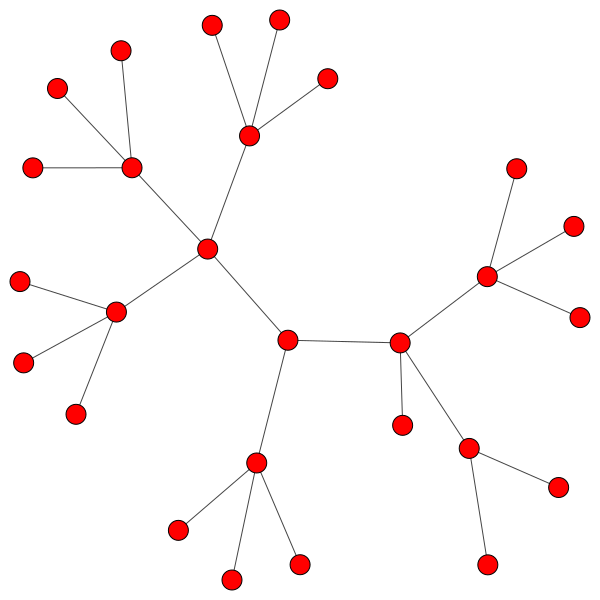

In [ ]:
#saving the plot in a file
ig.plot(g, target='example.pdf')


### **Complete** graph

In [ ]:
g= ig.Graph.Full(6)
print(g)

IGRAPH U--- 6 15 --
+ edges:
0 -- 1 2 3 4 5   2 -- 0 1 3 4 5   4 -- 0 1 2 3 5
1 -- 0 2 3 4 5   3 -- 0 1 2 4 5   5 -- 0 1 2 3 4


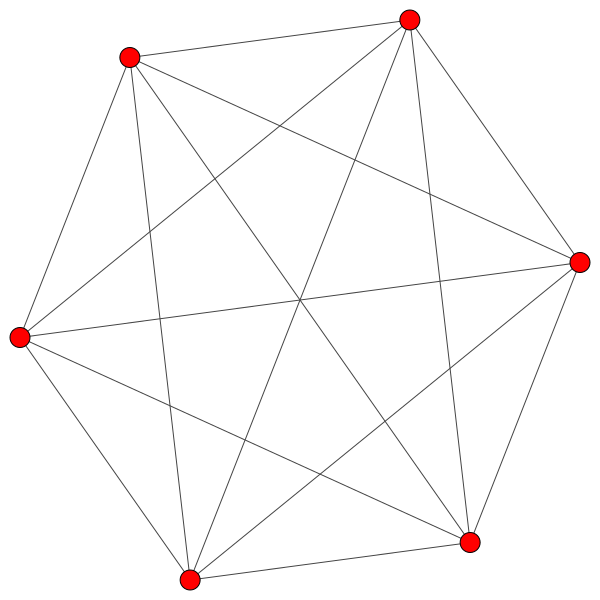

In [ ]:
ig.plot(g)

### Lattices

In [ ]:
g= ig.Graph.Lattice([3,10],circular=False)
print(g)

IGRAPH U--- 30 47 --
+ edges:
 0 --  1  3          8 --  5  7 11      16 -- 13 15 17 19   24 -- 21 25 27
 1 --  0  2  4       9 --  6 10 12      17 -- 14 16 20      25 -- 22 24 26 28
 2 --  1  5         10 --  7  9 11 13   18 -- 15 19 21      26 -- 23 25 29
 3 --  0  4  6      11 --  8 10 14      19 -- 16 18 20 22   27 -- 24 28
 4 --  1  3  5  7   12 --  9 13 15      20 -- 17 19 23      28 -- 25 27 29
 5 --  2  4  8      13 -- 10 12 14 16   21 -- 18 22 24      29 -- 26 28
 6 --  3  7  9      14 -- 11 13 17      22 -- 19 21 23 25
 7 --  4  6  8 10   15 -- 12 16 18      23 -- 20 22 26


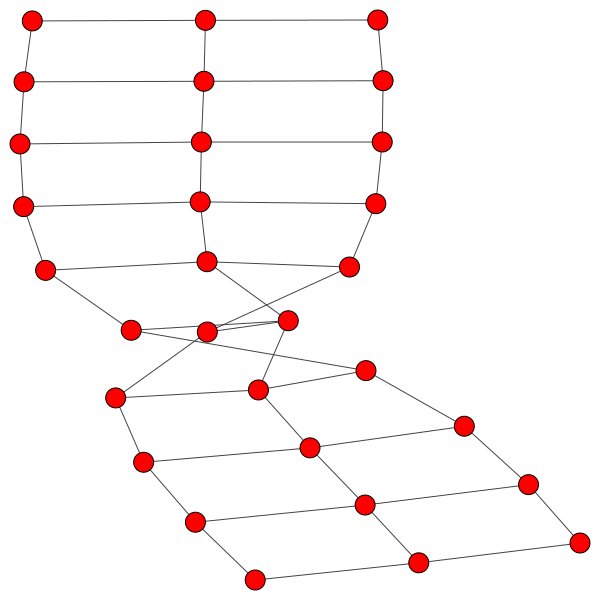

In [ ]:
ig.plot(g)

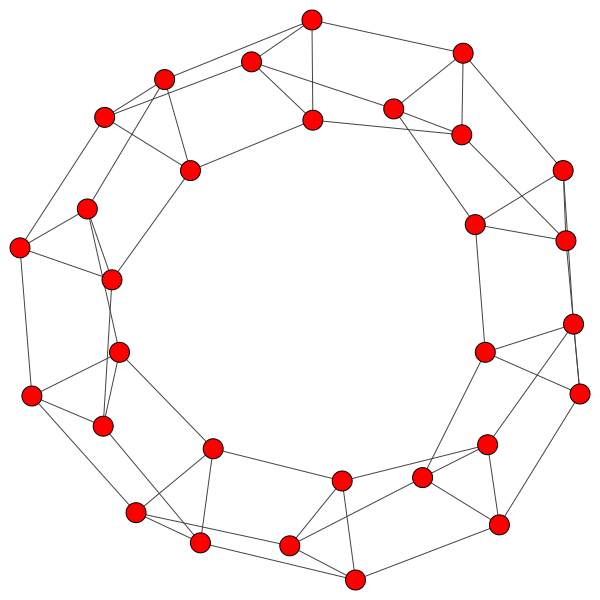

In [ ]:
g= ig.Graph.Lattice([3,10], circular = True)
# circular is used to connect each edge of the lattice back onto the other side,
#a process also known as “periodic boundary condition” that is sometimes helpful
#to smoothen out edge effects.
ig.plot(g)

### Stars

In [ ]:
g= ig.Graph.Star(7,mode = 'mutual')
#modes 'in', 'out', 'undirected', 'mutual'
print(g)

IGRAPH D--- 7 12 --
+ edges:
0->1 1->0 0->2 2->0 0->3 3->0 0->4 4->0 0->5 5->0 0->6 6->0


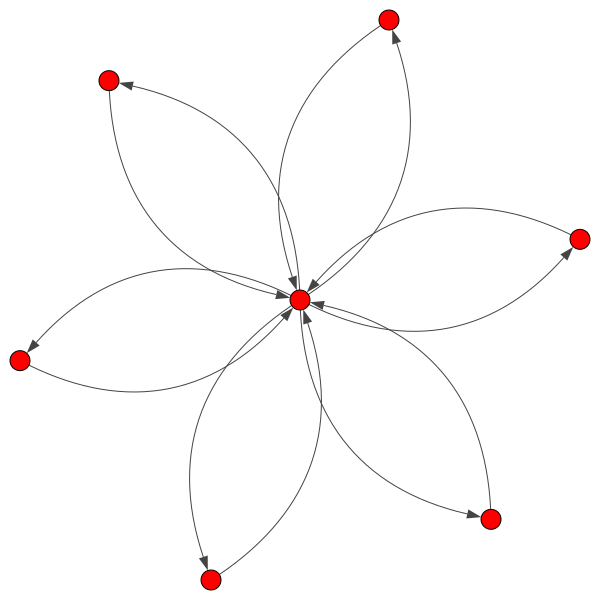

In [ ]:
ig.plot(g)

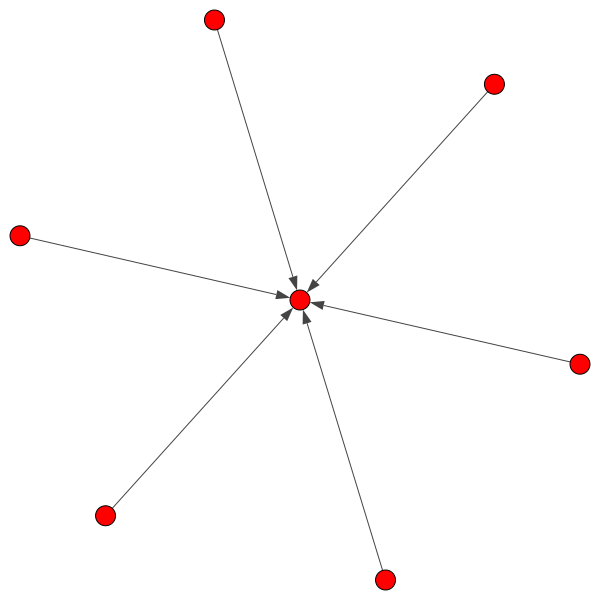

In [ ]:
g= ig.Graph.Star(7,mode = 'in')
ig.plot(g)

## Read Networks

There are a tons of different graph file format

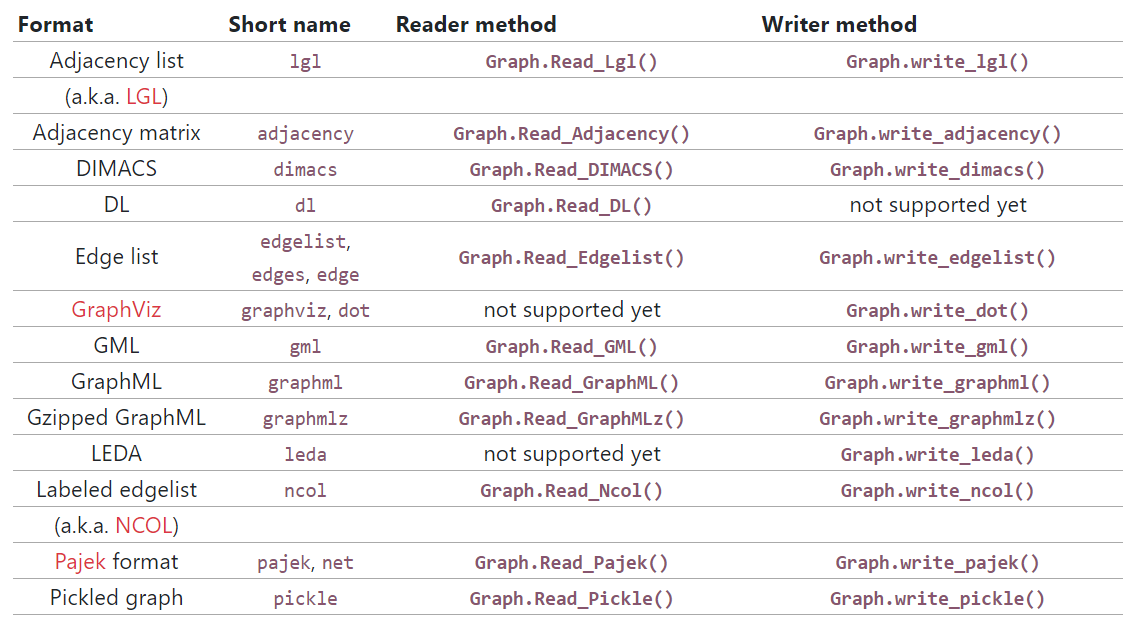

The csv file *dolphin_edges.csv* in the data folder contains the edge list of the undirected social network of 62 dolphins in a community living off Doubtful Sound, New Zealand.

https://medium.com/@cento_otto/a-social-network-of-dolphins-c073f3b8502d


In [ ]:
dolphinEdges = pd.read_csv("dolphin_edges.csv",header=None) #pandas
dolphinEdges

,0,1
0,CCL,Double
1,DN16,Feather
2,DN21,Feather
3,Beak,Fish
4,Bumper,Fish
...,...,...
154,Topless,Zap
155,Ripplefluke,Zig
156,Bumper,Zipfel
157,SN4,Zipfel


In [ ]:
reader = csv.reader(open("dolphin_edges.csv"))
type(reader)

_csv.reader

In [ ]:
g = ig.Graph.TupleList(reader) # constructs a graph from a list-of-tuples representation.
g.summary()
print(g)

IGRAPH UN-- 62 159 --
+ attr: name (v)
+ edges (vertex names):
        CCL -- Double, Grin, Zap
     Double -- CCL, Kringel, Oscar, SN4, Topless, Zap
       DN16 -- Feather, Gallatin, Wave, Web
    Feather -- DN16, DN21, Gallatin, Jet, Ripplefluke, SN90, Web
       DN21 -- Feather, Gallatin, Jet, Upbang, Wave, Web
       Beak -- Fish, Grin, Haecksel, SN9, SN96, TR77
       Fish -- Beak, Bumper, Patchback, SN96, TR77
     Bumper -- Fish, SN96, Thumper, Zipfel
   Gallatin -- DN16, Feather, DN21, Jet, Ripplefluke, SN90, Upbang, Web
       Grin -- CCL, Beak, Hook, MN83, Scabs, Shmuddel, SN4, SN63, SN9,
Stripes, TR99, TSN103
   Haecksel -- Beak, Jonah, MN83, SN9, Topless, Vau, Zap
       Hook -- Grin, Kringel, Scabs, SN4, SN63, TR99
 Beescratch -- Jet, Knit, Notch, Number1, Oscar, SN100, SN90, Upbang
        Jet -- Feather, DN21, Gallatin, Beescratch, MN23, Mus, Number1, Quasi,
Web
      Jonah -- Haecksel, Kringel, MN105, MN83, Patchback, Topless, Trigger
       Knit -- Beescratch, DN63, PL

In [ ]:
g.vs.attribute_names() #retrieve the attribute names of the graph

['name']

In [ ]:
print(g.vs['name']) #print the attributes values for all the elements

['CCL', 'Double', 'DN16', 'Feather', 'DN21', 'Beak', 'Fish', 'Bumper', 'Gallatin', 'Grin', 'Haecksel', 'Hook', 'Beescratch', 'Jet', 'Jonah', 'Knit', 'DN63', 'Kringel', 'MN105', 'MN23', 'MN83', 'Mus', 'Notch', 'Number1', 'Oscar', 'Patchback', 'PL', 'Quasi', 'Ripplefluke', 'Fork', 'Scabs', 'Shmuddel', 'SMN5', 'SN100', 'MN60', 'SN4', 'SN63', 'SN89', 'SN9', 'SN90', 'SN96', 'Stripes', 'Thumper', 'Topless', 'TR120', 'TR77', 'TR88', 'TR99', 'Cross', 'Trigger', 'Five', 'TSN103', 'TSN83', 'Upbang', 'Vau', 'Wave', 'Web', 'TR82', 'Whitetip', 'Zap', 'Zig', 'Zipfel']


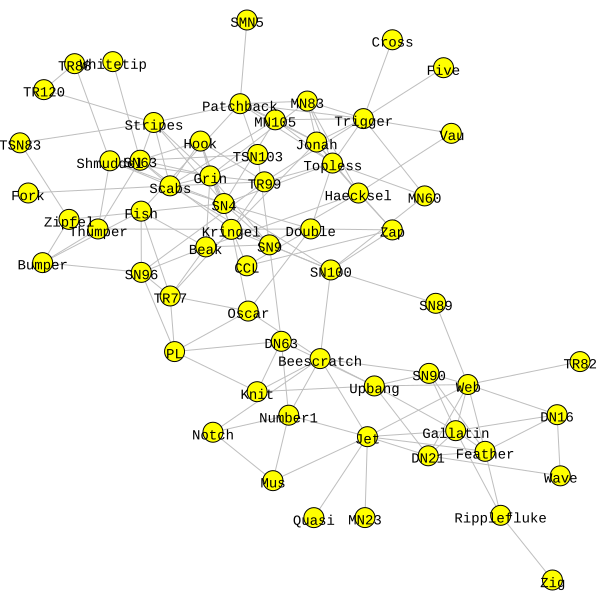

In [ ]:
ig.plot(g,
        vertex_size=20,
        vertex_color=['yellow'],
        vertex_label=g.vs['name'],
        edge_width=[1],
        edge_color=['grey'],
        )

In [ ]:
G = ig.Graph.Read("karate.gml", format="gml")
print(G)

#Zachary's karate club is a social network of a university karate club,
#described in the paper "An Information Flow Model for Conflict and Fission in
#Small Groups" by Wayne W. Zachary. The network became a popular example of
#community structure in networks after its use by Michelle Girvan and Mark Newman
#in 2002 [ref: https://pubmed.ncbi.nlm.nih.gov/12060727/]

#Network description (Wikipedia)
#A social network of a karate club was studied by Wayne W. Zachary for a period
#of three years from 1970 to 1972.[2] The network captures 34 members of a karate
#club, documenting links between pairs of members who interacted outside the club.
#During the study a conflict arose between the administrator "John A" and instructor
#"Mr. Hi" (pseudonyms), which led to the split of the club into two. Half of the
#members formed a new club around Mr. Hi; members from the other part found a new
#instructor or gave up karate. Based on collected data Zachary correctly assigned
#all but one member of the club to the groups they actually joined after the split.



IGRAPH U--- 34 78 --
+ attr: id (v)
+ edges:
 0 --  1  2  3  4  5  6  7  8 10 11 12 13 17 19 21 31      25 -- 23 24 31
 1 --  0  2  3  7 13 17 19 21 30                           26 -- 29 33
 2 --  0  1  3  7  8  9 13 27 28 32                        27 --  2 23 24 33
 3 --  0  1  2  7 12 13                                    28 --  2 31 33
 4 --  0  6 10                                             29 -- 23 26 32 33
 5 --  0  6 10 16                                          30 --  1  8 32 33
 6 --  0  4  5 16                                          31 --  0 24 25 28
32 33
 7 --  0  1  2  3                                          32 --  2  8 14 15
18 20 22 23 29 30 31 33
 8 --  0  2 30 32 33                                       33 --  8  9 13 14
15 18 19 20 22 23 26 27 28 29 30 31 32
 9 --  2 33
10 --  0  4  5
11 --  0
12 --  0  3
13 --  0  1  2  3 33
14 -- 32 33
15 -- 32 33
16 --  5  6
17 --  0  1
18 -- 32 33
19 --  0  1 33
20 -- 32 33
21 --  0  1
22 -- 32 33
23 -- 25 27 29 32 33
24 -

This network is so famous that it is built in *igraph*: the karate club network constructed by Zachary (1977).

In [ ]:
G = ig.Graph.Famous('Zachary')

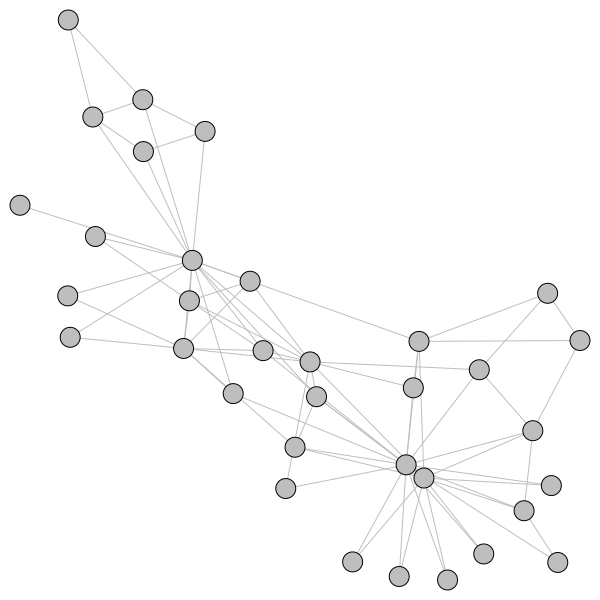

In [ ]:
G['layout'] = G.layout_fruchterman_reingold()
G.vs['color'] = 'gray'
G.es['color'] = 'gray'
ig.plot(G)

Some hints on the analysis of the network
https://studentwork.prattsi.org/infovis/labs/zacharys-karate-club/ (Student's work)

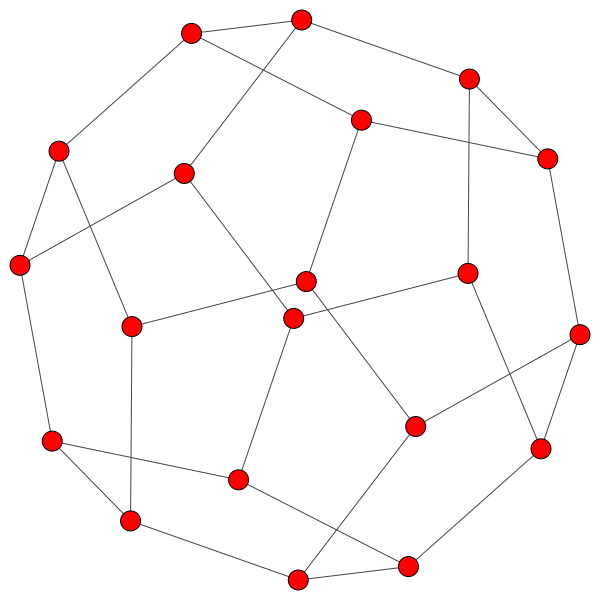

In [ ]:
# the list of famous graphs can be found here
# https://igraph.org/c/doc/igraph-Generators.html#igraph_famous

#Platonic solid with 20 vertices and 30 edges.
G2 = ig.Graph.Famous('Dodecahedral')
ig.plot(G2)


IGRAPH U--- 12 24 -- 


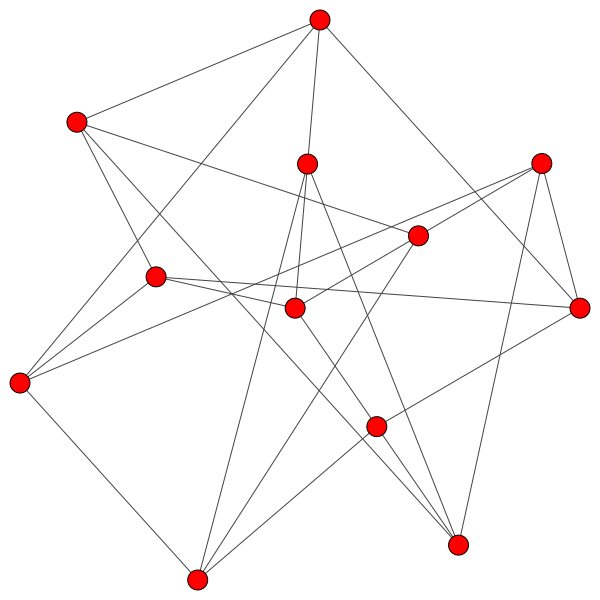

In [ ]:
#https://en.wikipedia.org/wiki/Chv%C3%A1tal_graph
G3 = ig.Graph.Famous('Chvatal')
ig.summary(G3)
ig.plot(G3,layout = 'reingold_tilford_circular')

## iGraph layouts


A layout is just a set of x and y coordinates. They can be specified manually but more often we will use
one of the *layout_functions*. Layout algorithms can either be called directly or using the common layout method called layout()


**General layouts**

* Graph.layout_star: star layout
* Graph.layout_circle: circular/spherical layout
* Graph.layout_grid: regular grid layout in 2D
* Graph.layout_grid_3d: regular grid layout in 3D
* Graph.layout_random: random layout (2D and 3D)

**The following algorithms produce nice layouts for general graphs:**

* Graph.layout_davidson_harel: Davidson-Harel layout, based on simulated annealing optimization including edge crossings
* Graph.layout_drl: DrL layout for large graphs (2D and 3D), a scalable force-directed layout
* Graph.layout_fruchterman_reingold: Fruchterman-Reingold layout (2D and 3D), a “spring-electric” layout based on classical physics
* Graph.layout_graphopt: the graphopt algorithm, another force-directed layout
* Graph.layout_kamada_kawai: Kamada-Kawai layout (2D and 3D), a “spring” layout based on classical physics
* Graph.layout_lgl: Large Graph Layout
* Graph.layout_mds: multidimensional scaling layout

**The following algorithms are useful for trees (and for Sugiyama directed acyclic graphs or DAGs):**

* Graph.layout_reingold_tilford: Reingold-Tilford layout
* Graph.layout_reingold_tilford_circular: circular Reingold-Tilford layout
* Graph.layout_sugiyama: Sugiyama layout, a hierarchical layout

**For bipartite graphs, there is a dedicated function:**

* Graph.layout_bipartite: bipartite layout

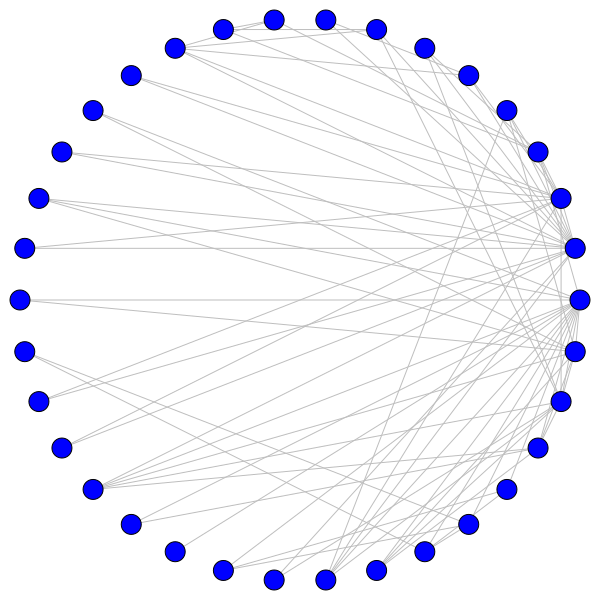

In [ ]:
#coming back to the Zachary karate club network
G['layout'] = G.layout_circle()
#G['layout'] = G.layout_random()
#G['layout'] = G.layout_mds()
G.vs['color'] = 'blue'
G.es['color'] = 'gray'
ig.plot(G)

In *igraph* the terms vertex and edges are used throughout, and they can be accessed through a so-called **VertexSequence** (vs) and **EdgeSequence** (es).

You can make different selections of vertices and edges, either based on **attributes** or simply specifying specific (vertex or edge) indices. The functionality on vertex and edge sequences is quite extensive.

In [ ]:
G.vs[0]

igraph.Vertex(<igraph.Graph object at 0x786275d24e50>, 0, {'color': 'blue'})

In [ ]:
G.es[0]

igraph.Edge(<igraph.Graph object at 0x786275d24e50>, 0, {'color': 'gray'})

In [ ]:
#let's check the attribute names of the vertices
G.vs.attribute_names()

['color']

In [ ]:
G.es.attribute_names()

['color']

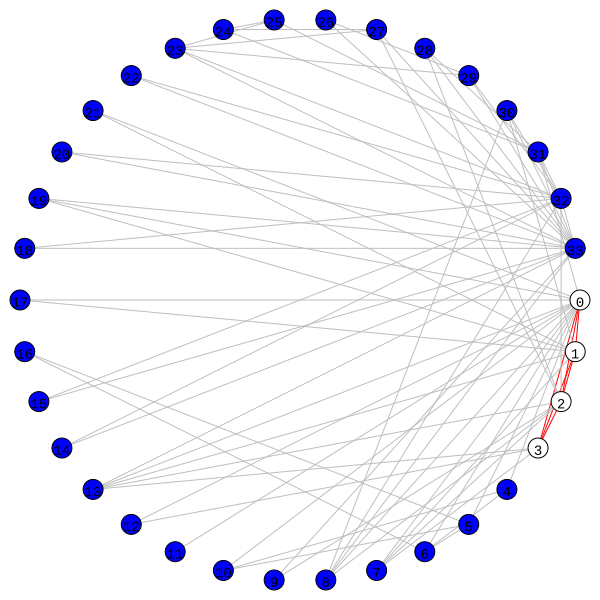

In [ ]:
#let us focus on the first 4 vertexes

selected_vertices = G.vs[[0, 1, 2, 3]]
selected_edges = G.es.select(_within=selected_vertices)

#_within takes a VertexSeq object or a list or set of vertex indices and selects
#all the edges that originate and terminate in the given vertex set.

#Using _source or _from in the keyword argument list of EdgeSeq.select()
#filters based on the source vertices of the edges.

#Using _target or _to filters based on the target vertices.

selected_vertices['color'] = 'white'
selected_edges['color'] = 'red'
selected_edges['weight'] = 4
G.vs['label'] = G.vs.indices #recover the vertex index and set it as label
ig.plot(G)

## Neighbours

A common task is to subset all of the neighbours of a particular vertex.

In [ ]:
source_vertex_id = 0
#let's select a particular vertex of the network

neighbors = G.neighbors(source_vertex_id)
#we compute its first neighbors

print(neighbors, G.degree(source_vertex_id))

[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31] 16


In [ ]:
#how do we extract the nodes that are not in the neighborhood

In [ ]:
#by using the set operators
set_all_nodes = set(G.vs.indices)
set_neighbors = set(neighbors)
set_unselected_vertices = set_all_nodes ^ set_neighbors
print(set_unselected_vertices)

{0, 9, 14, 15, 16, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33}


In [ ]:
#what about the source vertex?

In [ ]:
#plotting the neighbors

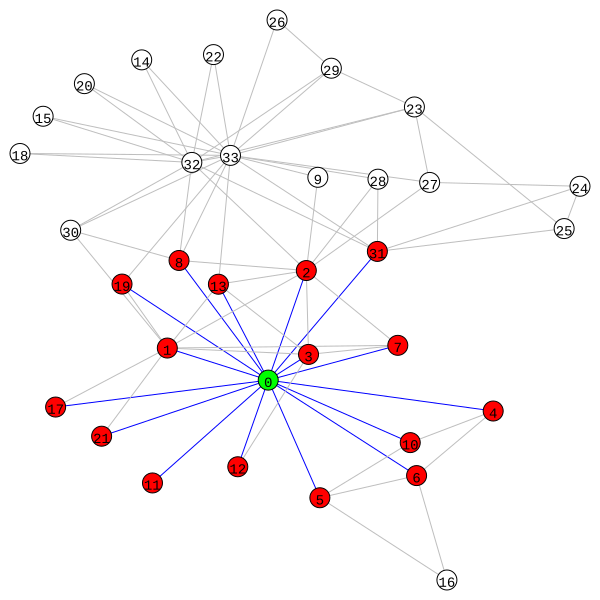

In [ ]:
source_vertex = G.vs[source_vertex_id]
selected_vertices = G.vs[neighbors]
unselected_vertices = G.vs[set_unselected_vertices]

selected_edges = G.es.select(_source=source_vertex_id)
#we used the _source argument to select some edges

#### plotting
G.es['color'] = 'grey'
G.vs['color'] = 'white'
G.vs['label'] = G.vs.indices #recover the vertex index and set it as label
G['layout'] = G.layout_kamada_kawai()

selected_vertices['color'] = 'red'
unselected_vertices['color'] = 'white'
source_vertex['color'] = 'green'
selected_edges['color'] = 'blue'

ig.plot(G)

We can also obtain all neighbours within a distance, *d*, of a number of targets

with the function **neighborhood**


In [ ]:
source_vertex_id = 0
neighborhood = G.neighborhood(source_vertex_id, order = 2)
print(neighborhood)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31, 30, 9, 27, 28, 32, 16, 33, 24, 25]


In [ ]:
#what about the source vertex?

In [ ]:
#let's plot the 2nd order neighborhood, with different colors with respect to the radius

In [ ]:
set_all_nodes = set(G.vs.indices)
set_neighborhood_1st = set(G.neighborhood(source_vertex_id, order = 1))
set_neighborhood_2nd = set(G.neighborhood(source_vertex_id, order = 2))

#some operations with the sets
set_unselected_vertices = set_all_nodes ^ set_neighborhood_2nd
set_neighborhood_2nd_not_1st = set_neighborhood_2nd ^ set_neighborhood_1st

print('The nodes that are in the 1st-order neighborhood are {}'.format(set_neighborhood_1st))
print('The nodes that are ONLY in the 2nd-order neighborhood are {}'.format(set_neighborhood_2nd_not_1st))
print('The nodes that are NOT in the neighborhood are {}'.format(set_unselected_vertices))

The nodes that are in the 1st-order neighborhood are {0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31}
The nodes that are ONLY in the 2nd-order neighborhood are {9, 16, 24, 25, 27, 28, 30, 32, 33}
The nodes that are NOT in the neighborhood are {14, 15, 18, 20, 22, 23, 26, 29}


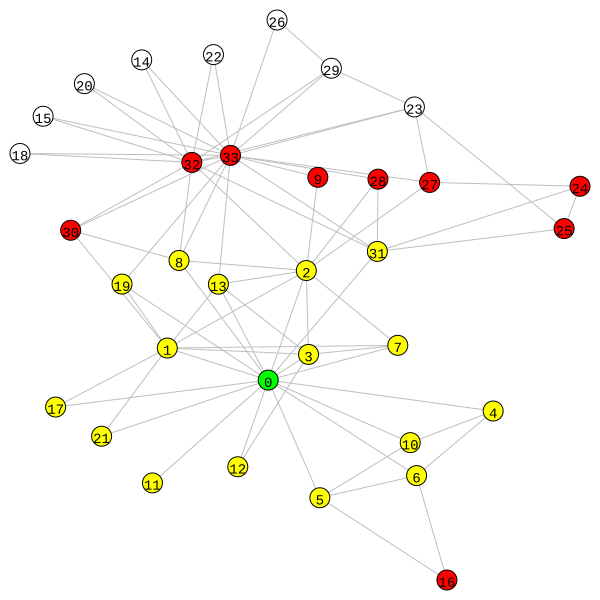

In [ ]:
#'refresh' the graph layout and colors
G.es['color'] = 'grey'
G.vs['color'] = 'white'
G.vs['label'] = G.vs.indices
G['layout'] = G.layout_kamada_kawai()

G.vs[set_neighborhood_2nd_not_1st]['color'] = 'red'
G.vs[set_neighborhood_1st]['color'] = 'yellow'
G.vs[source_vertex_id]['color'] = 'green'


ig.plot(G)

In [ ]:
#what about edges?

In [ ]:
selected_edges_from_source_vertex = G.es.select(_source=source_vertex)
#edges from source

selected_edges_from_1st_neighbors = G.es.select(_source=set_neighborhood_1st)
#edges from 1st neighbours
selected_edges_to_2nd_neighbors = G.es.select(_to=set_neighborhood_2nd_not_1st)
#edges to 2nd neighbors

set_edges_from_1st_to_2nd = set(selected_edges_from_1st_neighbors.indices).intersection(set(selected_edges_to_2nd_neighbors.indices))
#intersection between edges from 1st neighbors and edges to 2nd neighbors

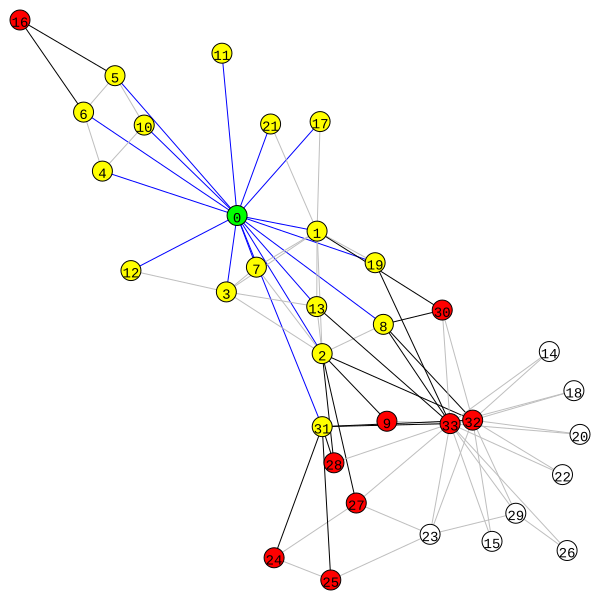

In [ ]:
G.es[set_edges_from_1st_to_2nd]['color'] = 'black'
selected_edges_from_source_vertex['color'] = 'blue'
#G['layout'] = G.layout_star()
G['layout'] = G.layout_fruchterman_reingold()
ig.plot(G)


From this neighborhood, we can induce a subgraph

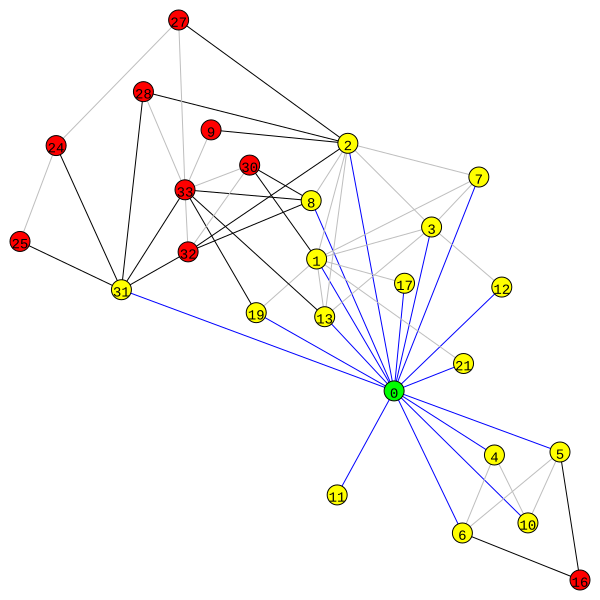

In [ ]:
induced_subgraph = G.induced_subgraph(neighborhood)
#Returns a subgraph spanned by the given vertices.
#Parameters	vertices	a list containing the vertex IDs which should be included

ig.plot(induced_subgraph,layout = 'davidson_harel')

In [ ]:
# How many nodes and edges, when order is set to 3?


[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31, 30, 9, 27, 28, 32, 16, 33, 24, 25, 23, 14, 15, 18, 20, 22, 29, 26]


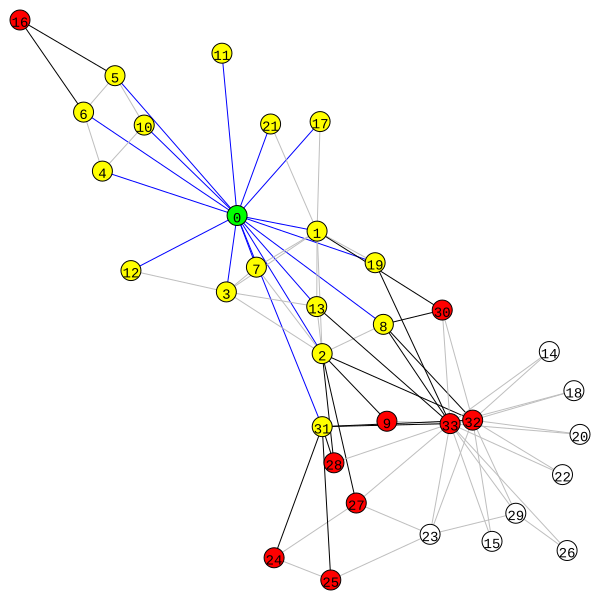

In [ ]:
#@title
neighborhood = G.neighborhood(0, order = 3)
print(neighborhood)

induced_subgraph = G.induced_subgraph(neighborhood)
ig.plot(induced_subgraph, vertex_label =induced_subgraph.vs.indices)

In [ ]:
#@title
print('The induced subgraph has {0} vertices and {1} edges'.
      format(len(induced_subgraph.vs()),len(induced_subgraph.es())))

The induced subgraph has 34 vertices and 78 edges


## Attributes

All objects in *igraph*, vertices and edges, can have attributes. Let's import the dataset of *Les Miserables*.

**Les Miserables**: coappearance weighted network of characters in the novel Les Miserables. D. E. Knuth, The Stanford GraphBase: A Platform for Combinatorial Computing, Addison-Wesley, Reading, MA (1993).

Another student's work:
https://studentwork.prattsi.org/infovis/visualization/les-miserables-character-network-visualization/

In [ ]:
G = ig.Graph.Read("lesmiserables.gml", format="gml")
print(G)

IGRAPH U--- 77 254 --
+ attr: id (v), label (v), value (e)
+ edges:
 0 --  1  2  3  4  5  6  7  8  9 11
 1 --  0
 2 --  0  3 11
 3 --  0  2 11
 4 --  0
 5 --  0
 6 --  0
 7 --  0
 8 --  0
 9 --  0
10 -- 11
11 --  0  2  3 10 12 13 14 15 23 24 25 26 27 28 29 31 32 33 34 35 36 37 38 43
44 48 49 51 55 58 64 68 69 70 71 72
12 -- 11 23
13 -- 11
14 -- 11
15 -- 11
16 -- 17 18 19 20 21 22 23 26 55
17 -- 16 18 19 20 21 22 23
18 -- 16 17 19 20 21 22 23
19 -- 16 17 18 20 21 22 23
20 -- 16 17 18 19 21 22 23
21 -- 16 17 18 19 20 22 23
22 -- 16 17 18 19 20 21 23
23 -- 11 12 16 17 18 19 20 21 22 24 25 27 29 30 31
24 -- 11 23 25 26 27 41 42 50 68 69 70
25 -- 11 23 24 26 27 39 40 41 42 48 55 68 69 70 71 75
26 -- 11 16 24 25 27 43 49 51 54 55 72
27 -- 11 23 24 25 26 28 29 31 33 43 48 58 68 69 70 71 72
28 -- 11 27 44 45
29 -- 11 23 27 34 35 36 37 38
30 -- 23 31
31 -- 11 23 27 30
32 -- 11
33 -- 11 27
34 -- 11 29 35 36 37 38
35 -- 11 29 34 36 37 38
36 -- 11 29 34 35 37 38
37 -- 11 29 34 35 36 38
38 -- 11 29

We can access to the attributes both of nodes and edges

In [ ]:
G.vs.attribute_names()

['id', 'label']

In [ ]:
G.vs.get_attribute_values('label')

['Myriel',
 'Napoleon',
 'MlleBaptistine',
 'MmeMagloire',
 'CountessDeLo',
 'Geborand',
 'Champtercier',
 'Cravatte',
 'Count',
 'OldMan',
 'Labarre',
 'Valjean',
 'Marguerite',
 'MmeDeR',
 'Isabeau',
 'Gervais',
 'Tholomyes',
 'Listolier',
 'Fameuil',
 'Blacheville',
 'Favourite',
 'Dahlia',
 'Zephine',
 'Fantine',
 'MmeThenardier',
 'Thenardier',
 'Cosette',
 'Javert',
 'Fauchelevent',
 'Bamatabois',
 'Perpetue',
 'Simplice',
 'Scaufflaire',
 'Woman1',
 'Judge',
 'Champmathieu',
 'Brevet',
 'Chenildieu',
 'Cochepaille',
 'Pontmercy',
 'Boulatruelle',
 'Eponine',
 'Anzelma',
 'Woman2',
 'MotherInnocent',
 'Gribier',
 'Jondrette',
 'MmeBurgon',
 'Gavroche',
 'Gillenormand',
 'Magnon',
 'MlleGillenormand',
 'MmePontmercy',
 'MlleVaubois',
 'LtGillenormand',
 'Marius',
 'BaronessT',
 'Mabeuf',
 'Enjolras',
 'Combeferre',
 'Prouvaire',
 'Feuilly',
 'Courfeyrac',
 'Bahorel',
 'Bossuet',
 'Joly',
 'Grantaire',
 'MotherPlutarch',
 'Gueulemer',
 'Babet',
 'Claquesous',
 'Montparnasse',
 'Tou

In [ ]:
G.vs[0]['label']

'Myriel'

In [ ]:
G.es.attribute_names()

['value']

In [ ]:
G.es.get_attribute_values('value')

[1.0,
 8.0,
 10.0,
 6.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 3.0,
 3.0,
 5.0,
 1.0,
 1.0,
 1.0,
 1.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 3.0,
 3.0,
 3.0,
 4.0,
 3.0,
 3.0,
 3.0,
 3.0,
 5.0,
 3.0,
 3.0,
 3.0,
 3.0,
 4.0,
 4.0,
 3.0,
 3.0,
 3.0,
 3.0,
 4.0,
 4.0,
 4.0,
 2.0,
 9.0,
 2.0,
 7.0,
 13.0,
 1.0,
 12.0,
 4.0,
 31.0,
 1.0,
 1.0,
 17.0,
 5.0,
 5.0,
 1.0,
 1.0,
 8.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 2.0,
 3.0,
 2.0,
 1.0,
 1.0,
 2.0,
 1.0,
 3.0,
 2.0,
 3.0,
 3.0,
 2.0,
 2.0,
 2.0,
 2.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 1.0,
 1.0,
 1.0,
 2.0,
 3.0,
 2.0,
 2.0,
 1.0,
 3.0,
 1.0,
 1.0,
 3.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 3.0,
 2.0,
 1.0,
 1.0,
 9.0,
 2.0,
 2.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 6.0,
 12.0,
 1.0,
 1.0,
 21.0,
 19.0,
 1.0,
 2.0,
 5.0,
 4.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 7.0,
 7.0,
 6.0,
 1.0,
 4.0,
 15.0,
 5.0,
 6.0,
 2.0,
 1.0,
 4.0,
 2.0,
 2.0,
 6.0,
 2.0,
 5.0,
 1.0,
 1.0,
 9.0,
 17.0,
 13.0,
 7.0,
 2.0,
 1.0,

In [ ]:
G.es[0]['value']

1.0

We can find the id of an edge between two vertices

In [ ]:
G.es[G.get_eid(2,3)]

igraph.Edge(<igraph.Graph object at 0x786275eed850>, 3, {'value': 6.0})

## Graph Plot


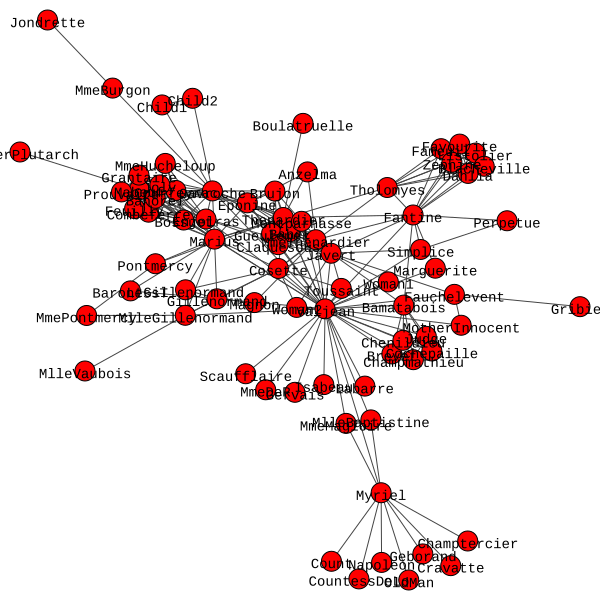

In [ ]:
#let's test some layouts to see what is more convenient or useful to our end

G['layout'] = G.layout_fruchterman_reingold()
# G['layout'] = G.layout_circle()
# G['layout'] = G.layout_star()
# G['layout'] = G.layout_grid()
# G['layout'] = G.layout_kamada_kawai()
ig.plot(G)

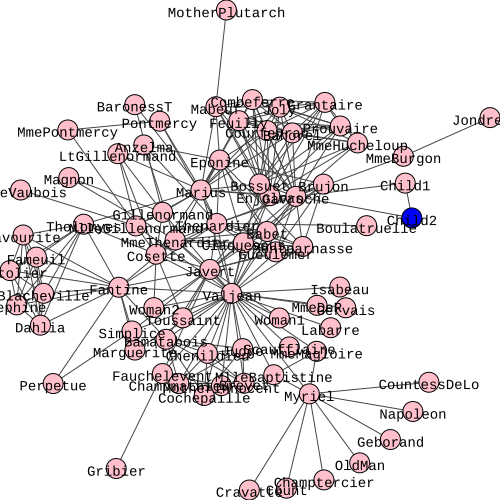

In [ ]:
G.vs["color"] = ["blue" if (label == "Child2") else "pink" for label in G.vs["label"]]
layout = G.layout_kamada_kawai()
ig.plot(G, layout = layout, bbox = (500, 500), margin = 10)

In [ ]:
# Color all the nodes which label start with M


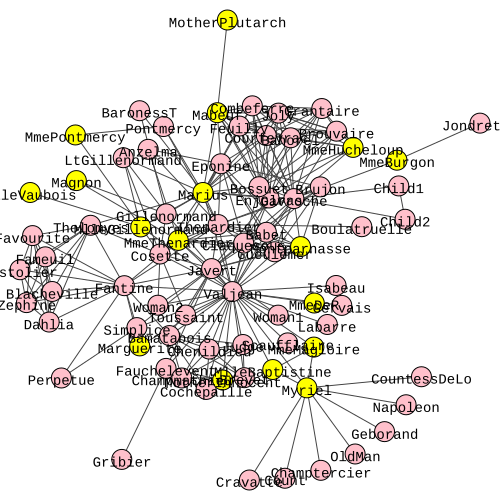

In [ ]:
#@title
G.vs["color"] = ["yellow" if (label[0].upper() == 'M') else "pink" for label in G.vs["label"]]
#inline for loop

layout = G.layout_kamada_kawai()
ig.plot(G, layout = layout, bbox = (500, 500), margin = 20)

{'vertex_size': 20, 'vertex_color': ['pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'yellow', 'pink', 'pink', 'pink', 'blue', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink', 'pink'], 'vertex_label': ['Myriel', 'Napoleon', 'MlleBaptistine', 'MmeMagloire', 'CountessDeLo', 'Geborand', 'Champtercier', 'Cravatte', 'Count', 'OldMan', 'Labarre', 'Valjean', 'Marguerite', 'MmeDeR', 'Isabeau', 'Gervais', 'Tholomyes', 'Listolier', 'Fameuil', 'Blacheville', 'Favourite', 'Dahlia', 'Zephine', 'Fantine', 'MmeThenardier', 'Thenardier', '

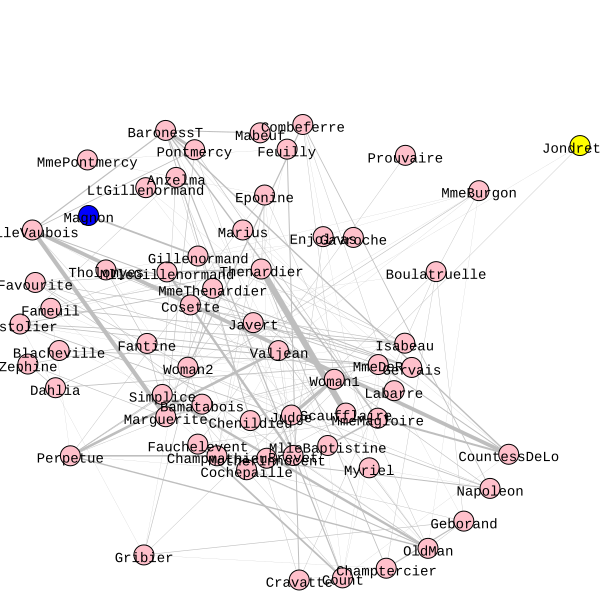

In [ ]:
#let's introduce keywords
visual_style = {} #Python dictionary

visual_style["vertex_size"] = 20
visual_style["vertex_color"] = ["blue" if (l == "Magnon") else
                                "yellow" if (l == "Jondrette") else
                                "pink" for
                                l in G.vs["label"]]
visual_style["vertex_label"] = G.vs["label"]
visual_style["edge_width"] = [element / 5 for element in G.es["value"]]
visual_style["edge_color"] = "grey"
visual_style["layout"] = layout
print(visual_style)
ig.plot(g, **visual_style)
#In a function definition, the double asterisk is also known  **kwargs.
#They used to pass a keyword, variable-length argument dictionary to a function


In [ ]:
# Set to 10 the edge_width of the edges that have an edge value higher than 10,
# 1 otherwise, potrebbe essere che se superano 10 allora non sono casuali.


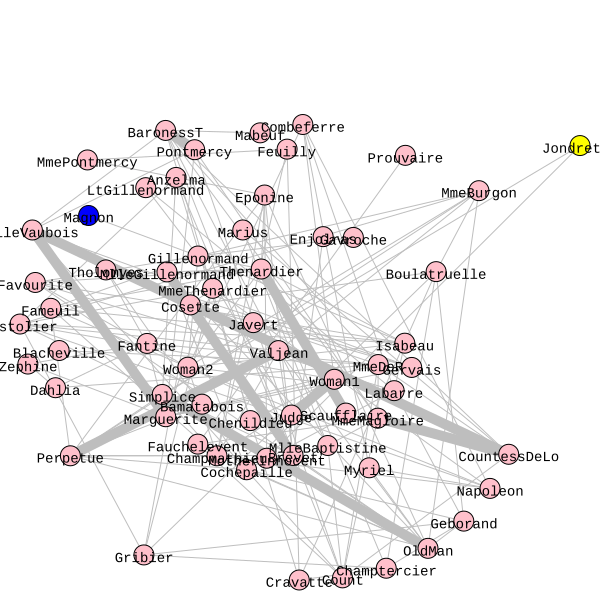

In [ ]:
#@title
visual_style["edge_width"] = [10 if (l >= 10) else 1 for l in G.es["value"]]
ig.plot(g, **visual_style)


## Shortest Path

In graph theory a **path** is a sequence of vertices, each connected to the next with an edge.

A geodesic, or **shortest path**, must not cross itself. In igraph we get shortest paths with:

In [ ]:
edge_paths = G.get_shortest_paths(v=16, to=15, output='epath')
edge_paths

[[39, 47, 17]]


This retrieves a shortest path between node 16 and node 15.

It's a **list of lists** because there might be more than one shortest path.

It returns the indices of the edges because we set output='**epath**'.
In this case there is only one path of 3 edges long.

We can also get the endpoints of those edges, so that the path becomes a bit more clear.


In [ ]:
edge_path = G.es[edge_paths[0]]
[(edge.source, edge.target) for edge in edge_path]

[(16, 23), (11, 23), (11, 15)]

We can also get the same path in terms of vertices setting output = '**vpath**'

In [ ]:
vertex_path = G.vs[G.get_shortest_paths(v=16, to=15, output='vpath')[0]]
print(vertex_path.indices)

[16, 23, 11, 15]


And we can retrieve the names corresponding to vertexes

In [ ]:
print('The shortest path connects {}'.
      format([G.vs['label'][i] for i in vertex_path.indices]))

The shortest path connects ['Tholomyes', 'Fantine', 'Valjean', 'Gervais']


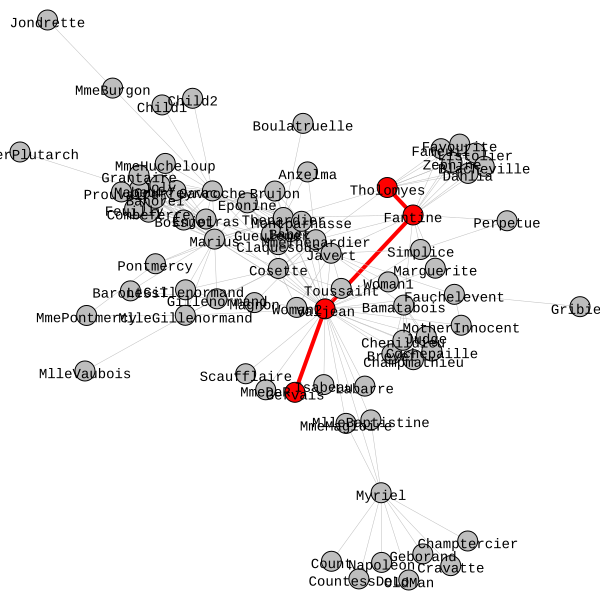

In [ ]:
#let's plot the shortest path
G.vs['color'] = 'gray'
vertex_path['color'] = 'red'

G.es['color'] = 'gray'
G.es['width'] = 0.5

edge_path['color'] = 'red'
edge_path['width'] = 4

ig.plot(G)

We can also use this function to get the distance of all nodes to all other nodes. This is conveniently represented as a matrix, for which the **numpy library** is especially well suited.

In [ ]:
distances = np.array(G.shortest_paths())
distances

<ipython-input-94-2d1da97b2986>:1: DeprecationWarning: Graph.shortest_paths() is deprecated; use Graph.distances() instead
  distances = np.array(G.shortest_paths())


array([[0, 1, 1, ..., 3, 3, 3],
       [1, 0, 2, ..., 4, 4, 4],
       [1, 2, 0, ..., 3, 3, 3],
       ...,
       [3, 4, 3, ..., 0, 2, 2],
       [3, 4, 3, ..., 2, 0, 2],
       [3, 4, 3, ..., 2, 2, 0]])

We can also compute the **diameter** of a network, which gives a good idea of the effective size of the network.

The diameter is the shortest distance between the two most distant nodes in the network.

In [ ]:
G.diameter()

5

## Degree Centrality
Simplest form of centrality, defined as the number of links incident upon a node

In [ ]:
g = ig.Graph.Famous('Zachary')
g.vs['color'] = 'gray' #reset colors
g.es['color'] = 'gray'
g['layout'] = g.layout_auto()

In [ ]:
g.degree(g.vs, mode="all")
#degree centrality per tutta la vertex sequence

#mode = all per undirected graphs
#mode = in per in-degree centrality (directed graphs)
#mode = out per out-degree centrality (directed graphs)


[16,
 9,
 10,
 6,
 3,
 4,
 4,
 4,
 5,
 2,
 3,
 1,
 2,
 5,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 5,
 3,
 3,
 2,
 4,
 3,
 4,
 4,
 6,
 12,
 17]

In [ ]:
g.vs['centrality'] = g.degree(g.vs, mode="all")

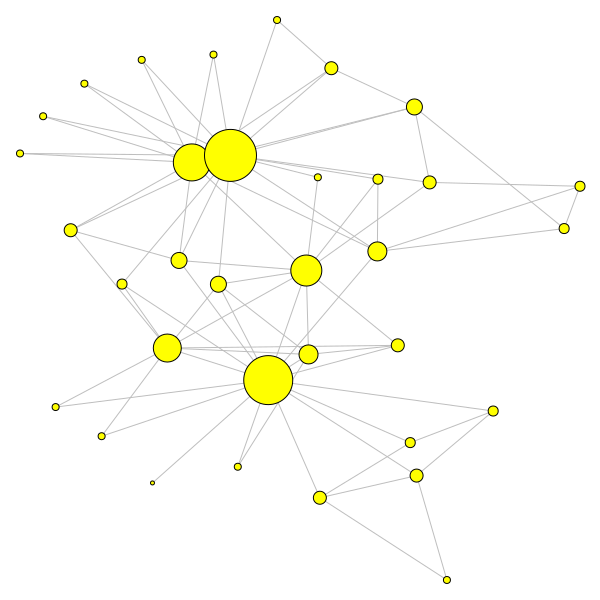

In [ ]:
ig.plot(g, vertex_size=3*np.array(g.vs['centrality'])+1,vertex_color = 'yellow')

In [ ]:
# can you compute the degree centralization of this network?

In [ ]:
#@title
#sum of the difference of the max degree centrality and each node's degree centrality
#normalized for the degrees of freedom
sum([g.maxdegree() - node['centrality'] for node in g.vs()]) / ((g.vcount() - 1)*(g.vcount() -2))

0.3996212121212121

In [ ]:
# can you normalize the degree centrality values?

In [ ]:
#@title
[val / g.maxdegree() for val in g.degree(g.vs, mode="all")]

[0.9411764705882353,
 0.5294117647058824,
 0.5882352941176471,
 0.35294117647058826,
 0.17647058823529413,
 0.23529411764705882,
 0.23529411764705882,
 0.23529411764705882,
 0.29411764705882354,
 0.11764705882352941,
 0.17647058823529413,
 0.058823529411764705,
 0.11764705882352941,
 0.29411764705882354,
 0.11764705882352941,
 0.11764705882352941,
 0.11764705882352941,
 0.11764705882352941,
 0.11764705882352941,
 0.17647058823529413,
 0.11764705882352941,
 0.11764705882352941,
 0.11764705882352941,
 0.29411764705882354,
 0.17647058823529413,
 0.17647058823529413,
 0.11764705882352941,
 0.23529411764705882,
 0.17647058823529413,
 0.23529411764705882,
 0.23529411764705882,
 0.35294117647058826,
 0.7058823529411765,
 1.0]

## Betweeness Centrality

Betweeness centrality is based on the distances between vertices. It is (roughly) the number of shortest paths that pass through any given node. Vertices with a high betweenness score will often act as bridging nodes between one or more communities.

Quindi quanto viene usato quel node per trasmettere informazione.

In [ ]:
g.betweenness()

[231.0714285714286,
 28.478571428571424,
 75.85079365079366,
 6.288095238095237,
 0.3333333333333333,
 15.833333333333334,
 15.833333333333332,
 0.0,
 29.529365079365082,
 0.44761904761904764,
 0.3333333333333333,
 0.0,
 0.0,
 24.215873015873015,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 17.1468253968254,
 0.0,
 0.0,
 0.0,
 9.299999999999999,
 1.1666666666666665,
 2.0277777777777777,
 0.0,
 11.79206349206349,
 0.9476190476190476,
 1.5428571428571427,
 7.609523809523807,
 73.00952380952378,
 76.69047619047619,
 160.5515873015873]

Cercare il fattore di scala giusto poichè 1 e 0.5 dava cerchi troppo grossi.

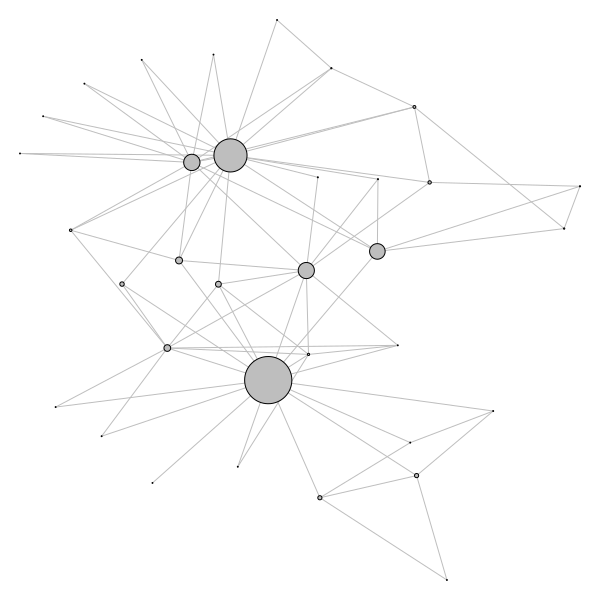

In [ ]:
g.vs['centrality'] = g.betweenness(g.vs, directed=False) #beware at the default values
ig.plot(g, vertex_size=0.2*np.array(g.vs['centrality']) + 1)

## Eigenvector Centrality

The **Eigenvector corresponding to the largest Eigenvalue of the adjacency matrix** gives a high score to vertices that either have a lot of connections, or are connected to someone with a lot of connections.

It assigns relative scores to all nodes in the network based on the concept that **connections to high-scoring nodes contribute more to the score of the node in question than equal connections to low-scoring nodes**

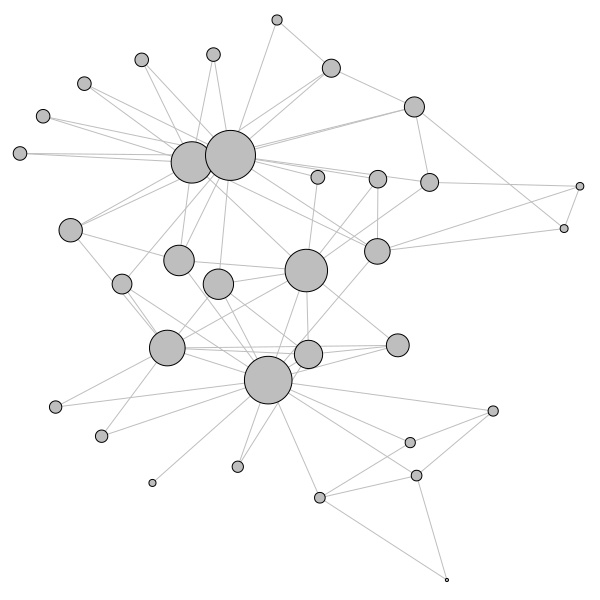

In [ ]:
g.vs['centrality'] = g.eigenvector_centrality(directed=False)
ig.plot(g, vertex_size=50*np.array(g.vs['centrality']))

## Pagerank

PageRank is the centrality measure used by Google to rank web pages. It is a variant of Eigenvector centrality. In fact *Page* refers to Larry Page, not a web page.
It has a damping (damping in igraph) term, this imagines that you will click a few links but will eventually give up. Then there is another parameter (personalized in igraph) that represents the chance that at any moment the search is abandoned and reset to a given vertex.

In Eigenvector, all influence is passed to all connected nodes: this can lead to a saturation of the measure. PageRank splits the influence between the connected nodes, dividing the influence passed between the connected nodes. The sum of PageRank in a network is 1.

NB: this measure should only be used on directed network, since it's based on in and out degree concept. Here is shown just as a tip for future use

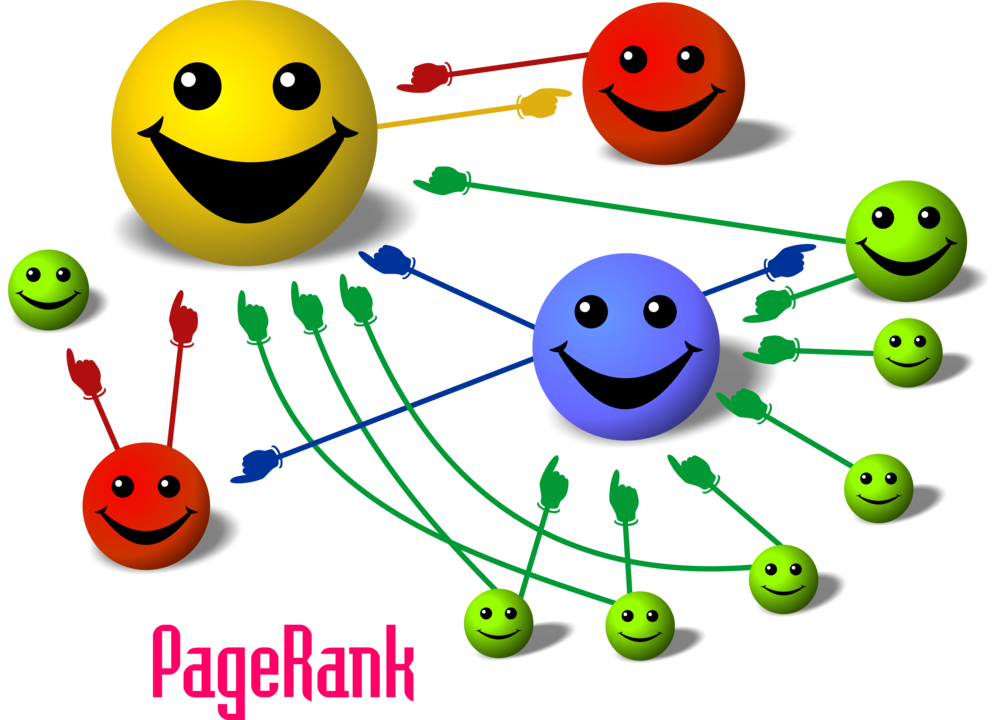

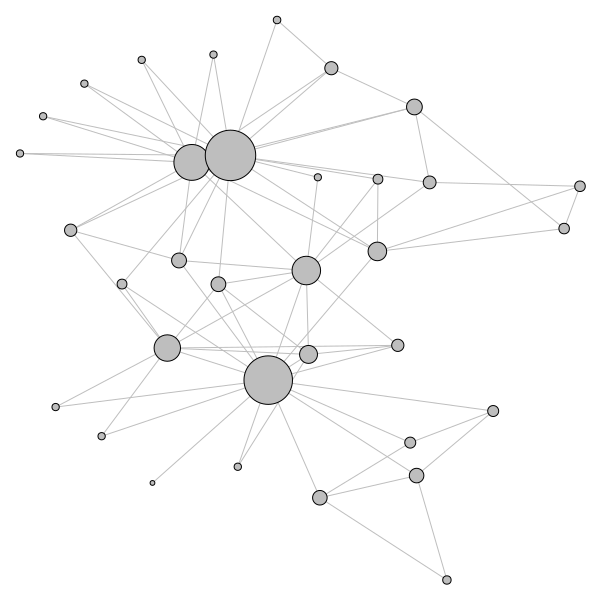

In [ ]:
g.vs['centrality'] = g.pagerank(directed=False)
ig.plot(g, vertex_size=500*np.array(g.vs['centrality']))


# **EXCERCISE**: the ENRON email network

The Enron email (Klimt & Yang, 2004) network is a social network constructed from email communication in a large corporation.

Due to its size it has previously been
partitioned only by algorithms such as Fast Greedy community detection.

The Enron corpus, a large set of email messages, was made public during the legal investigation concerning the Enron corporation.

The raw Enron corpus contains 619,446 messages sent to and received by 158 Enron employees.

From this email corpus a network was constructed in which the email addresses are represented by nodes and emails between two addresses are represented by links. This network contains 77849 nodes and 310744
directed weighted links.

Non-Enron email addresses act as sinks and sources because only emails from and to Enron employees were included in the corpus. The network does not contain an explicit community structure, but community structure has been explored using community detection algorithms.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Goal: Identify different positions in a hierarchy

First point: understand the application domain — what are the emails about? Try to find this information online.

It is important to understand the degree of hierarchy: why does one person have 1,000 edges, while another has only a single one? Is there an explanation for this? Conduct online research to investigate further.

Are the nodes (wells) relevant or not? Assess their significance.

Use various network analysis metrics such as centrality and betweenness.

The final report should be approximately 4 pages long (or 3 full pages)

**Suggestions:**
1. Find the vertex (or vertexes) with the highest degree

2. Plot a histogram of the shortest path lenghts between all vertices

3. Estimate degree distribution, closeness, betweeness, eigenvector & PageRank centralities

4. Plot the results of the different views of networks according to the previous measures

5. other analyses?

### Which insights can be derived?


In [ ]:
#@title
Enron_G= ig.Graph.Read("enron.gml", format="gml")
ig.summary(Enron_G)

IGRAPH D-W- 78849 310744 -- 
+ attr: id (v), label (v), weight (e)


/usr/local/lib/python3.11/dist-packages/igraph/io/files.py:295: RuntimeWarning: Unterminated entity or stray & character found, will be returned verbatim. at src/io/gml.c:148
  return reader(f, *args, **kwds)


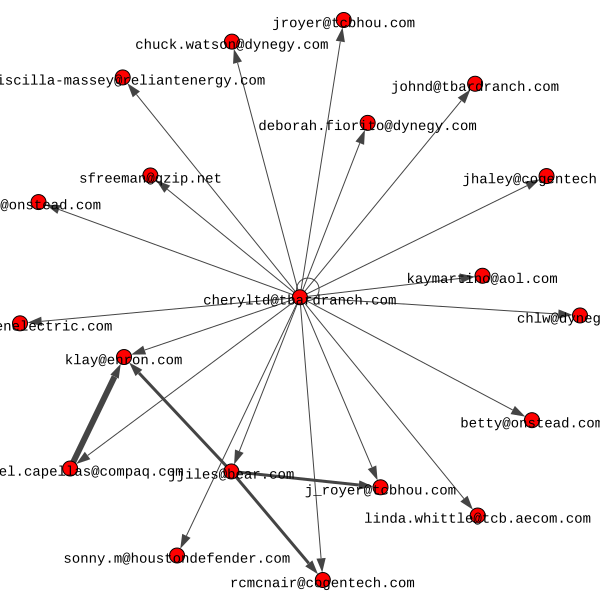

In [ ]:
#@title
source_vertex_id = 5
neighborhood = Enron_G.neighborhood(source_vertex_id, order = 1, mode = 'out')
Enron_G_subgraph = Enron_G.induced_subgraph(neighborhood)

visual_style = {}
visual_style["edge_width"] = Enron_G_subgraph.es["weight"]
visual_style["layout"] = 'kk'
visual_style["vertex_size"]= 15
ig.plot(Enron_G_subgraph,**visual_style)


Let's start by understanding how our graph is structured and therefore understand the different attractors involved in the system domain

In [ ]:
Enron_G.vs.attribute_names()

['id', 'label']

In [ ]:
Enron_G.vs[0]

igraph.Vertex(<igraph.Graph object at 0x786275d25a50>, 0, {'id': 0.0, 'label': 'csutter@enron.com'})

The weight will define how many emails will have passed through 2 nodes

In [ ]:
Enron_G.es.attribute_names()

['weight']

In [ ]:
Enron_G.es[0]

igraph.Edge(<igraph.Graph object at 0x786275d25a50>, 0, {'weight': 3.0})

This will be an example of how to print a subgraph

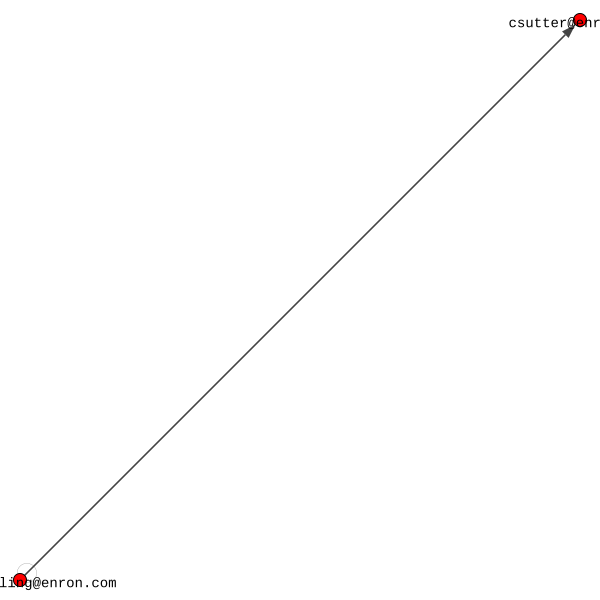

In [ ]:
source_vertex_id = 0

# Find all incident arcs at node 0 (entry + exit)
incident_edges = Enron_G.incident(source_vertex_id, mode='ALL')

# Get the IDs of the nodes involved in these edges (source and target of each edge)
vertices_set = set()
for edge_id in incident_edges:
    edge = Enron_G.es[edge_id]
    vertices_set.add(edge.source)
    vertices_set.add(edge.target)

# Create the subgraph containing only those nodes and edges
subgraph = Enron_G.induced_subgraph(vertices_set)

# Scale the weights of the arcs
scaled_weights = [w * 0.2 for w in subgraph.es["weight"]]

# View Subgraph
visual_style = {
    "layout": "kk",
    "vertex_size": 13,
    "vertex_label": subgraph.vs["label"],
    "edge_width": scaled_weights
}

ig.plot(subgraph, **visual_style)


#### Point 1/2/3 : Let's try to look at the main nodes for each metric

In [ ]:
degrees = Enron_G.degree()

The shape of the distribution suggests that:

Most nodes have a very low number of links (low connectivity),

While very few nodes have a very high number of connections, i.e. they act as central hubs in the network.

This is consistent with the structure of scale-free networks, where a few nodes (in this case individuals in the Enron network) play a crucial role in communications and the flow of information.

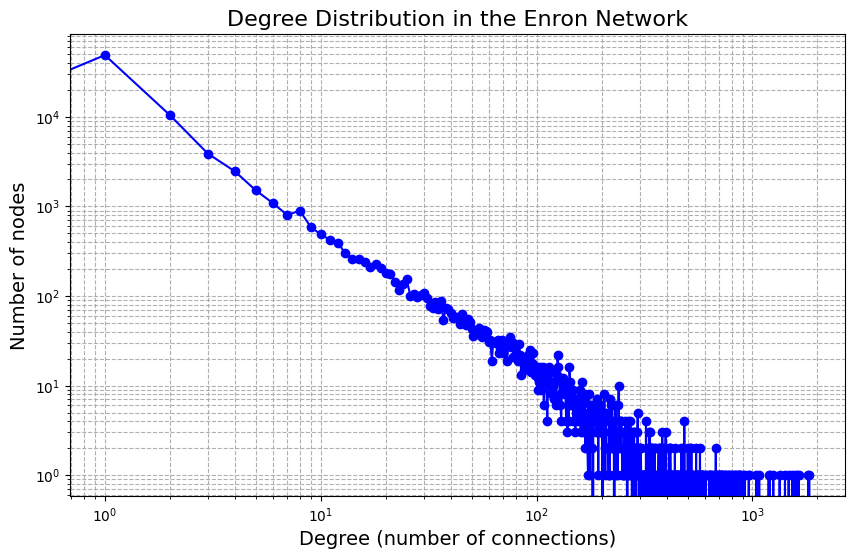

In [ ]:
# 1. Calculate the degree distribution
degree_counts = np.bincount(degrees)

# 2. Create a corresponding list of degree values
degree_values = np.arange(len(degree_counts))

# 3. Visualize the distribution
plt.figure(figsize=(10, 6))
plt.plot(degree_values, degree_counts, 'bo-')
plt.title('Degree Distribution in the Enron Network', fontsize=16)
plt.xlabel('Degree (number of connections)', fontsize=14)
plt.ylabel('Number of nodes', fontsize=14)
plt.yscale('log')
plt.xscale('log')
plt.grid(True, which="both", ls="--")
plt.show()

In [ ]:
# Find the min and max value
max_degree = max(degrees)
min_degree = min(degrees)

max_degree_vertex = None
min_degree_vertex = None

# Iterate to find the min and max grade for the nodes
for vertex in Enron_G.vs:
    # If the grade of the vertex is equal to the max grade
    if vertex.degree() == max_degree and max_degree_vertex is None:
        max_degree_vertex = vertex
        print(f"Vertex with maximum degree: ID = {vertex.index}, Name = {vertex['label']}, Degree = {max_degree}")

    # If the grade of the vertex is equal to the min grade
    if vertex.degree() == min_degree and min_degree_vertex is None:
        min_degree_vertex = vertex
        print(f"Vertex with minimum degree: ID = {vertex.index}, Name = {vertex['label']}, Degree = {min_degree}")

    # Stop the cycle after finding the min and the max grade
    if max_degree_vertex and min_degree_vertex:
        break

Vertex with minimum degree: ID = 0, Name = csutter@enron.com, Degree = 1
Vertex with maximum degree: ID = 4479, Name = sally.beck@enron.com, Degree = 1835


In [ ]:
# Looking the name of the mx degree vertex
max_degree_vertex

igraph.Vertex(<igraph.Graph object at 0x786275d25a50>, 4479, {'id': 4479.0, 'label': 'sally.beck@enron.com'})

In [ ]:
source_vertex_id = 4479
print(f"Degree of node {source_vertex_id}: {Enron_G.degree(source_vertex_id)}")

Degree of node 4479: 1835


In [ ]:
print('The graph G has max vertex: {0} nodes; and min vertex: {1}!'.format(max_degree_vertex, min_degree_vertex))

The graph G has max vertex: igraph.Vertex(<igraph.Graph object at 0x786275d25a50>, 4479, {'id': 4479.0, 'label': 'sally.beck@enron.com'}) nodes; and min vertex: igraph.Vertex(<igraph.Graph object at 0x786275d25a50>, 0, {'id': 0.0, 'label': 'csutter@enron.com'})!


**csutter@enron.com**

The email is not showing up in the dataset and I can't find the actual email, it could have been a test email that was not stored or was logged differently. Some testing emails might not have detailed information like a regular email in the dataset.

**Sally Beck**

Its central position in Enron's corporate communications graph is indicative of its crucial role in day-to-day operations. An analysis of centrality measures ranked Sally Beck among the company's top five most influential employees, emphasizing the importance of her operational and risk management functions.

In [ ]:
csutter_vertex = Enron_G.vs.find(label="csutter@enron.com")

connected_vertices = Enron_G.neighbors(csutter_vertex.index, mode="in")

for vertex_index in connected_vertices:
    connected_vertex = Enron_G.vs[vertex_index]
    print(f"csutter@enron.com is connected to {connected_vertex['label']} (ID: {connected_vertex.index})")


csutter@enron.com is connected to jeff.skilling@enron.com (ID: 49535)


As we can see, the graph is unwatchable

In [ ]:
# I get the 1st-order neighborhood (nodes directly reachable)
# Only the nodes that can be reached from the starting node
neighborhood = Enron_G.neighborhood(source_vertex_id, order=1, mode='out')

# I create the induced subgraph
Enron_G_subgraph = Enron_G.induced_subgraph(neighborhood)
visual_style = {}

# 1. Rescaling the edge weights
weights = Enron_G_subgraph.es["weight"]
weights_array = np.array(weights)

# I define the minimum and maximum width
min_width = 0.5
max_width = 10

# I normalize the weights
weights_scaled = min_width + (weights_array - weights_array.min()) * (max_width - min_width) / (weights_array.max() - weights_array.min())

# 2. I set the visual style
visual_style["edge_width"] = list(weights_scaled)
visual_style["layout"] = 'kk'  # Kamada-Kawai layout
visual_style["vertex_size"] = 15

# 3. Plot
ig.plot(Enron_G_subgraph, **visual_style)

Output hidden; open in https://colab.research.google.com to view.

To better understand the structural role of node 4479 within the network, further analysis would be necessary. Specifically, performing community detection could help determine whether the node truly acts as a central hub that connects different communities, or if it simply belongs to a densely connected local cluster. This would clarify whether its apparent centrality is due to a global role or a local group structure.

Additionally, computing the betweenness centrality would allow us to assess whether node 4479 functions as a bridge between different parts of the network, facilitating indirect communication between otherwise disconnected nodes. However, such an analysis was not required as part of the current task.

It would also be informative to evaluate the eigenvector centrality of the node, which measures its influence based on the centrality of its neighbors. A high eigenvector centrality would suggest that the node is not only well-connected, but is also connected to other influential nodes — a typical feature of true hubs within a network

<ipython-input-126-d97cc985ccd3>:2: DeprecationWarning: Graph.shortest_paths() is deprecated; use Graph.distances() instead
  shortest_paths = Enron_G.shortest_paths_dijkstra(source=source_vertex_id)[0]


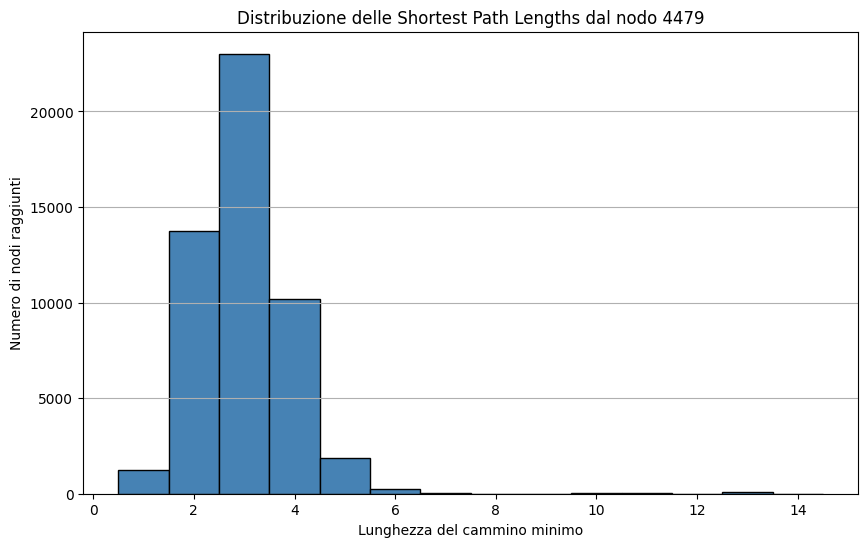

In [ ]:
# Calculate the shortest path for the node 4479
shortest_paths = Enron_G.shortest_paths_dijkstra(source=source_vertex_id)[0]

# Exclude the node itself and the well nodes
distances = [d for d in shortest_paths if d != 0 and not np.isinf(d)]

plt.figure(figsize=(10, 6))
plt.hist(distances, bins=range(1, int(max(distances)) + 2), color='steelblue', edgecolor='black', align='left')
plt.title("Distribution of Shortest Path Lengths from node 4479")
plt.xlabel("Length of the minimum path")
plt.ylabel("Number of nodes reached")
plt.grid(axis='y')
plt.show()

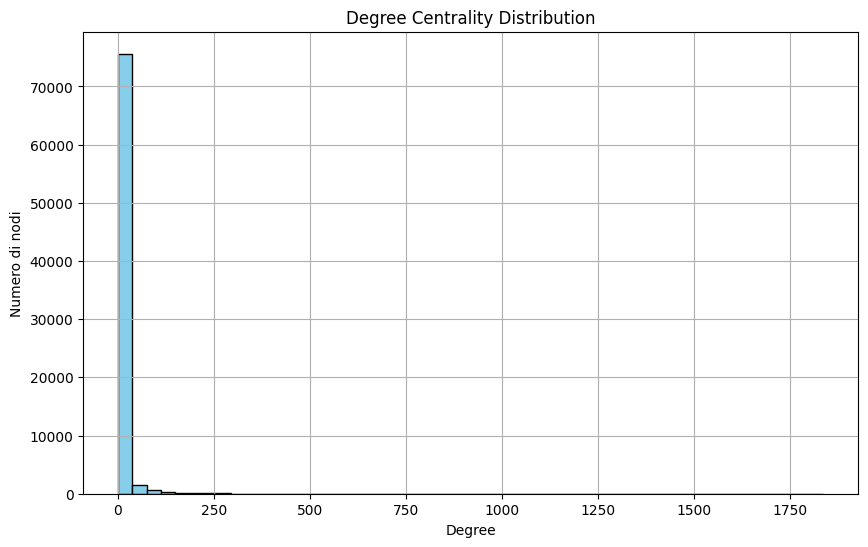

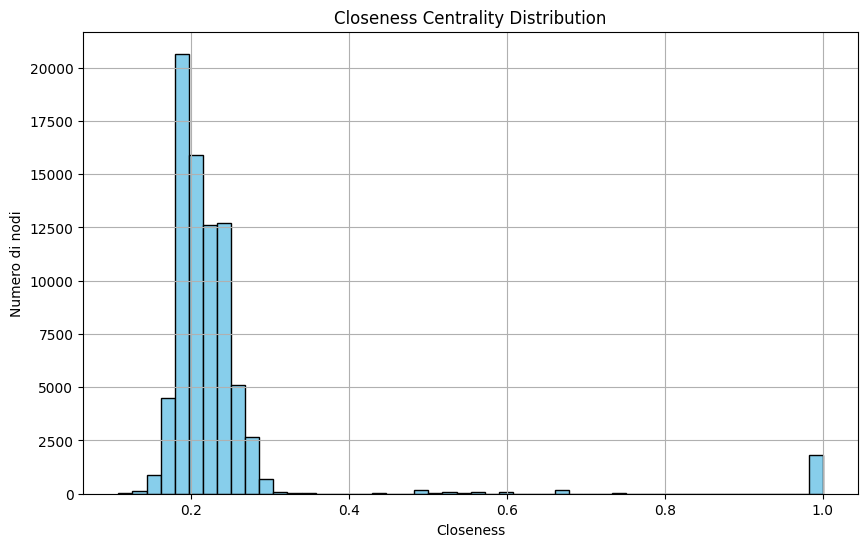

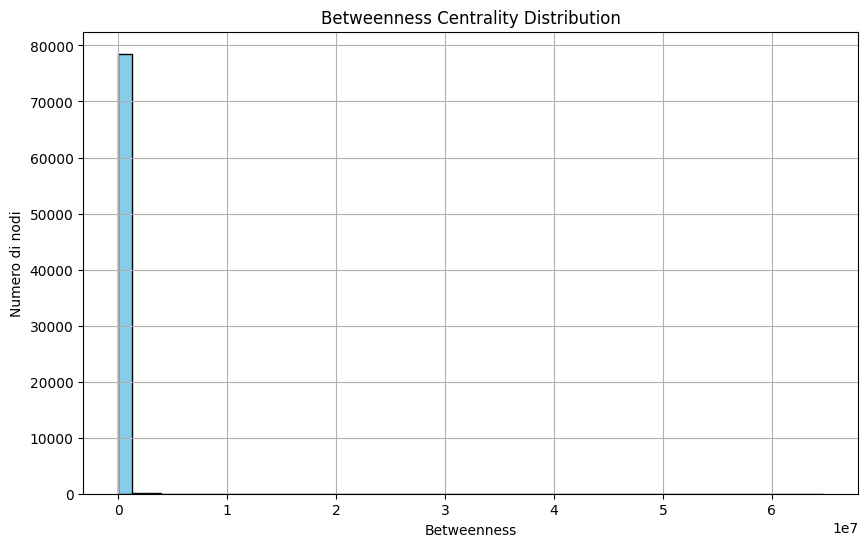

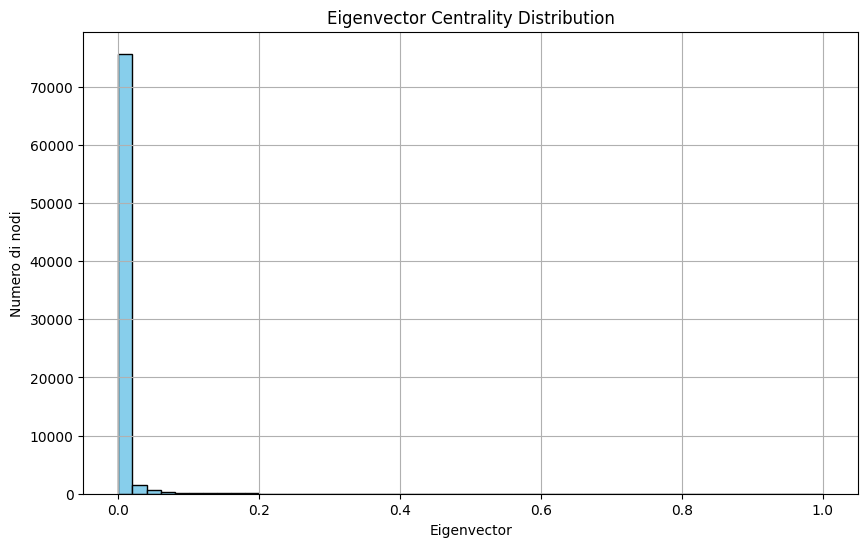

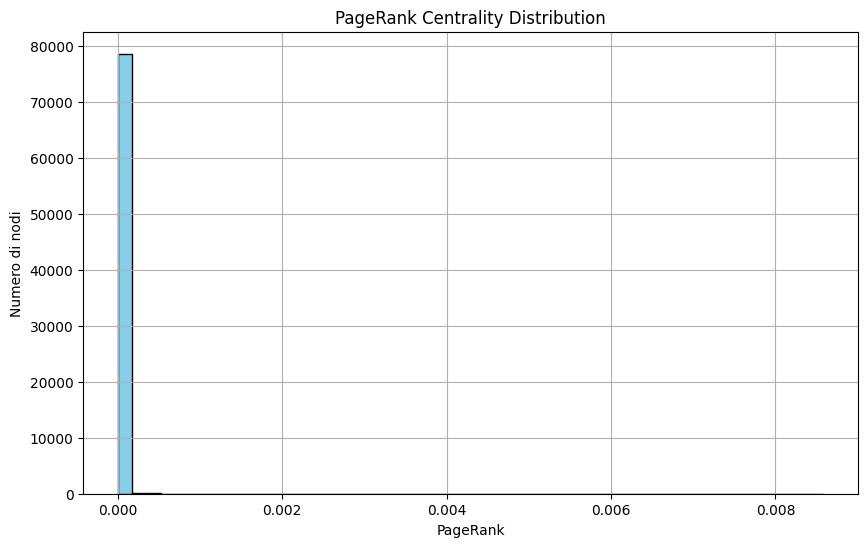

In [ ]:
# Centrality calculation, I think I should have considered weights for some of these measures
degree_centrality = Enron_G.degree()
closeness_centrality = Enron_G.closeness()
betweenness_centrality = Enron_G.betweenness()
eigenvector_centrality = Enron_G.eigenvector_centrality()
pagerank_centrality = Enron_G.pagerank()

# Function to plot histograms
def plot_distribution(values, title, xlabel):
    plt.figure(figsize=(10, 6))
    plt.hist(values, bins=50, color='skyblue', edgecolor='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Numero di nodi")
    plt.grid(True)
    plt.show()

plot_distribution(degree_centrality, "Degree Centrality Distribution", "Degree")
plot_distribution(closeness_centrality, "Closeness Centrality Distribution", "Closeness")
plot_distribution(betweenness_centrality, "Betweenness Centrality Distribution", "Betweenness")
plot_distribution(eigenvector_centrality, "Eigenvector Centrality Distribution", "Eigenvector")
plot_distribution(pagerank_centrality, "PageRank Centrality Distribution", "PageRank")

In [ ]:
# Funzione generale per stampare i top N nodi ordinati per una metrica
def print_top_n(metric, name, graph, n=10):
    metric_pairs = list(enumerate(metric))  # (indice_nodo, valore)
    sorted_pairs = sorted(metric_pairs, key=lambda x: x[1], reverse=True)[:n]  # ordina decrescente

    print(f"\nTop {n} nodi per {name}:")
    for idx, value in sorted_pairs:
        label = graph.vs[idx]["label"] if "label" in graph.vs[idx].attributes() else "N/A"
        print(f"ID: {idx}, Label: {label}, {name}: {value:.4f}")

# Esecuzione per ciascuna metrica
print_top_n(degree_centrality, "Degree", Enron_G)
print_top_n(closeness_centrality, "Closeness", Enron_G)
print_top_n(betweenness_centrality, "Betweenness", Enron_G)
print_top_n(eigenvector_centrality, "Eigenvector", Enron_G)
print_top_n(pagerank_centrality, "PageRank", Enron_G)


Top 10 nodi per Degree:
ID: 4479, Label: sally.beck@enron.com, Degree: 1835.0000
ID: 7682, Label: kenneth.lay@enron.com, Degree: 1816.0000
ID: 45760, Label: jeff.dasovich@enron.com, Degree: 1641.0000
ID: 16881, Label: outlook.team@enron.com, Degree: 1605.0000
ID: 20140, Label: david.forster@enron.com, Degree: 1574.0000
ID: 49535, Label: jeff.skilling@enron.com, Degree: 1532.0000
ID: 50104, Label: tana.jones@enron.com, Degree: 1471.0000
ID: 9331, Label: sara.shackleton@enron.com, Degree: 1414.0000
ID: 31667, Label: klay@enron.com, Degree: 1336.0000
ID: 54757, Label: technology.enron@enron.com, Degree: 1248.0000

Top 10 nodi per Closeness:
ID: 27, Label: yitnslzgek@hey.letskeepintouch.com, Closeness: 1.0000
ID: 105, Label: 0889@netscape.com, Closeness: 1.0000
ID: 122, Label: ksherwood@uschamber.com, Closeness: 1.0000
ID: 172, Label: tour18houston@palmergolf.com, Closeness: 1.0000
ID: 187, Label: storm@lists.hurricanecentral.com, Closeness: 1.0000
ID: 269, Label: b24089@mail.md, Closenes

#### Point 4 : Let's see how the nodes are placed within the graph and understand the reason for these values

Most important actors for each category:
**1. Top 1 for Degree:**

ID: 4479

Label: sally.beck@enron.com

Degree: 1835

Description: Sally Beck was a member of Enron's legal department. She held a central position in corporate communications.

**2. Top 1 for Closeness:**

ID: 27

Label: yitnslzgek@hey.letskeepintouch.com

Closeness: 1.0000

I miscalculated the closness in fact the node in question with 1.00 has no nodes nearby.

**3. Top 1 for Betweenness:**

ID: 45760

Label: jeff.dasovich@enron.com

Betweenness: 64700668.8400

Description: Jeff Dasovich was Vice President of Public Affairs at Enron. He played a crucial role in public relations and politics and was a central figure in internal communications and negotiations.

**4. Top 1 for Eigenvector:**
ID: 71498

Label: louise.kitchen@enron.com

Eigenvector: 1.0000

Description: Louise Kitchen was Senior Vice President at Enron and a key figure in the company's financial and commercial sectors.

**5. Top 1 for PageRank:**

ID: 31667

Label: klay@enron.com

PageRank: 0.0086

Description: The contact associated with "klay" could be Ken Lay, the founder and CEO of Enron, known for his centrality and influence in corporate and political communications.

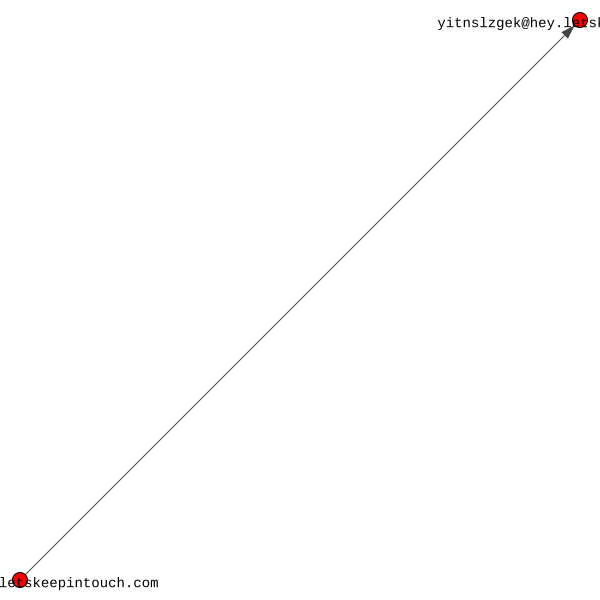

In [ ]:
# Wrong closness
source_vertex_id = 27
neighborhood = Enron_G.neighborhood(source_vertex_id, order = 1, mode = 'in')
Enron_G_subgraph = Enron_G.induced_subgraph(neighborhood)

visual_style = {}
visual_style["edge_width"] = Enron_G_subgraph.es["weight"]
visual_style["layout"] = 'kk'
visual_style["vertex_size"]= 15
ig.plot(Enron_G_subgraph,**visual_style)


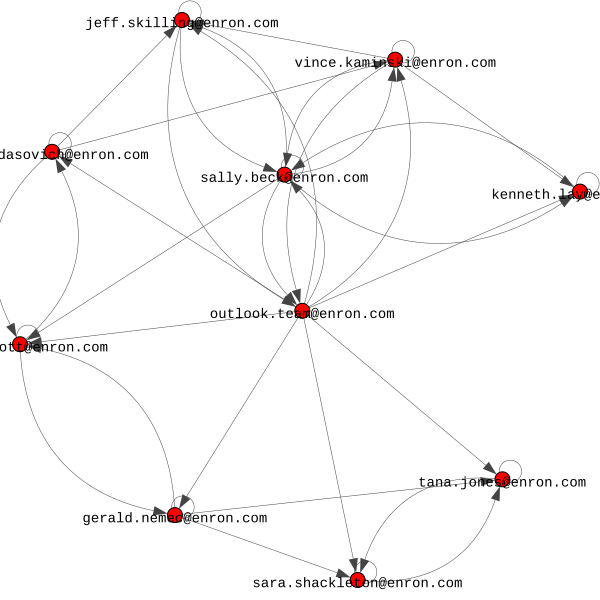

In [ ]:
# Get the top N nodes based on betweenness centrality
top_n = 10  # for example, top 10 nodes
top_nodes = sorted(range(len(betweenness_centrality)), key=lambda i: betweenness_centrality[i], reverse=True)[:top_n]

# Create a subgraph with only the top N nodes
Enron_G_top = Enron_G.subgraph(top_nodes)

# Set up visual style
visual_style = {}
visual_style["edge_width"] = 0.5
visual_style["vertex_size"] = 15
visual_style["layout"] = 'kk'  # Kamada-Kawai layout, good for small to medium graphs

# Plot the subgraph
ig.plot(Enron_G_top, **visual_style)

The figure displays the 20 nodes with the highest betweenness centrality values. Although the graph itself is not particularly informative in its current form — for instance, due to the lack of labels or a descriptive legend — it nonetheless provides a preliminary indication of the key actors within the network.

Betweenness centrality quantifies how often a node appears on the shortest paths between pairs of other nodes. Therefore, nodes with high betweenness can be interpreted as critical intermediaries or connectors in the network. In the context of corporate email communication, this likely corresponds to individuals who facilitate the flow of information between different parts of the organization, and may thus be considered some of the most influential figures within the network.

<ipython-input-160-53401feb46fd>:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  node_sizes = [float(s) for s in btw_scaled]


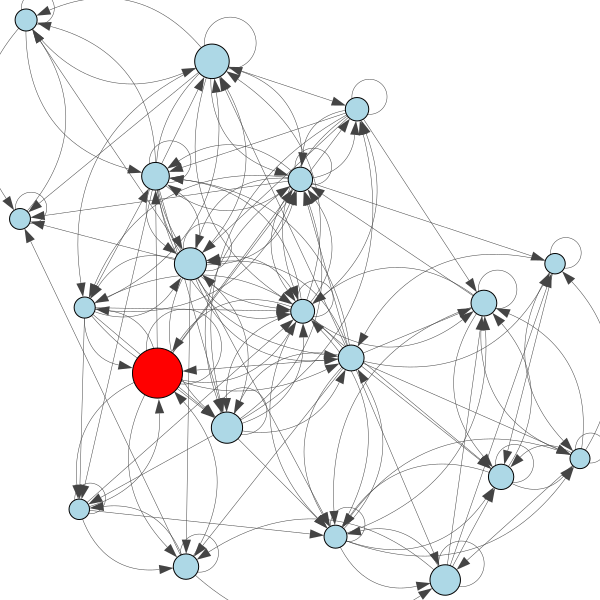

In [ ]:
central_node = 45760

# 1. Get the nodes in the 2-hop neighborhood
neighbors_order2 = Enron_G.neighborhood(central_node, order=2, mode='all')

# 2. Add the central node if it's not already included
if central_node not in neighbors_order2:
    neighbors_order2.append(central_node)

# 3. Create a list of (node_id, betweenness) for each node in the neighborhood
neighbors_with_btw = [(v, betweenness_centrality[v]) for v in neighbors_order2]

# 4. Sort by decreasing betweenness and select the top 20 + central node
top_neighbors = sorted(neighbors_with_btw, key=lambda x: x[1], reverse=True)

# Keep a maximum of 20 neighbors + the central node
top_ids = [v[0] for v in top_neighbors[:20]]
if central_node not in top_ids:
    top_ids.append(central_node)

# 5. Create the induced subgraph
subgraph = Enron_G.induced_subgraph(top_ids)

node_indices = [Enron_G.vs.find(label=v["label"]).index for v in subgraph.vs]

# Normalize betweenness values between 20 and 50 for visualization
scaler = MinMaxScaler(feature_range=(20, 50))
btw_scaled = scaler.fit_transform([[betweenness_centrality[i]] for i in node_indices])
node_sizes = [float(s) for s in btw_scaled]
node_colors = ['red' if i == central_node else 'lightblue' for i in node_indices]

# 8. Layout and visualization
layout = subgraph.layout('kk')
visual_style = {
    "layout": layout,
    "vertex_size": node_sizes,
    "vertex_color": node_colors,
    "edge_width": 0.5,
    "vertex_label": None,  # or "label" if you want to display the email addresses
}

# 9. Display the graph
ig.plot(subgraph, **visual_style)


This is certainly a fascinating topic that deserves further exploration. However, for the purposes of this task, I will conclude my analysis here. It should be noted that the centrality calculation appears to be incorrect, and it would be valuable to apply a community detection algorithm in order to better understand the structural dynamics of the network.